TALLER N°2 - ANIALITICA DE DATOS

Ana Catalina Gelvez - 201015132
Nicolas Gonzalez Ochoa 202010501

Caso - HabitAlpes

In [217]:
#Libreriras básicas
import re
from datetime import datetime

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [218]:
#Intalación librerias extras
%pip install levenshtein
%pip install seaborn
%pip install scipy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [219]:
#Importación seaborn y scipy para visualización
import seaborn as sns
from scipy.stats import ttest_ind, shapiro, mannwhitneyu, chi2_contingency

from Levenshtein import distance, ratio

#**[10%] ENTENDIMIENTO Y PREPARACIÓN DE LOS DATOS**

Conexión Dataset

In [220]:
pd.set_option("display.max_columns", None)

1. Acercamiento y entendimiento inicial

In [221]:
#Dataset importado correctamente

habitalpes_df=pd.read_csv('apartamentos.csv')
habitalpes_df.head()

_id   codigo tipo_propiedad tipo_operacion  \
0  66d86c7eceda690e85508760  4133491    APARTAMENTO          VENTA   
1  66d86c7eceda690e85508761  3889852    APARTAMENTO          VENTA   
2  66d86c7eceda690e85508762  4386770    APARTAMENTO          VENTA   
3  66d86c7eceda690e85508763  4210060    APARTAMENTO          VENTA   
4  66d86c7eceda690e85508764  4063762    APARTAMENTO          VENTA   

   precio_venta  area  habitaciones  banos  administracion  parqueaderos  \
0   339000000.0  76.0           3.0    2.0        300000.0           1.0   
1   223000000.0  63.0           3.0    2.0             NaN           0.0   
2   440898168.0  54.0           3.0    2.0        305000.0           0.0   
3   158000000.0  43.0           2.0    2.0        106600.0           0.0   
4   222800000.0  48.0           3.0    2.0        151000.0           0.0   

                sector  estrato          antiguedad   latitud   longitud  \
0             BRITALIA      3.0  ENTRE 10 Y 20 ANOS  4.746592 -74.057571   
1  SAN CRISTOBAL NORTE      3.0      MAS DE 20 ANOS  4.730111 -74.028170   
2            LA SABANA      3.0    ENTRE 0 Y 5 ANOS  4.607378 -74.082648   
3            TIBABUYES      2.0  ENTRE 10 Y 20 ANOS  4.740109 -74.113675   
4             VERBENAL      3.0      MAS DE 20 ANOS  4.763900 -74.025280   

               direccion                                        descripcion  \
0   CARRERA 55A # 163-35  apartamento en venta de 76m2, con vista exteri...   
1  CARRERA 7F # 153 - 75  apartamento en venta de 60m2, con vista interi...   
2    CARRERA 69C #2 - 60  apartamento en venta de 54m2, con vista exteri...   
3    CALLE 131C # 126-95  apartamento en venta de 43 m2, con vista inter...   
4     CARRERA 5 # 187-15  apartamento duplex en venta de 48m2, con vista...   

   website                last_view                 datetime  \
0  habi.co  2024-08-13 10:34:47.315  2024-07-03 23:27:30.843   
1  habi.co  2024-09-03 23:46:46.547  2024-07-03 23:27:31.667   
2  habi.co  2024-07-10 18:19:39.749  2024-07-03 23:27:31.886   
3  habi.co  2024-07-10 18:19:03.061  2024-07-03 23:27:32.141   
4  habi.co  2024-09-03 23:46:46.592  2024-07-03 23:27:32.361   

                                                 url  \
0  https://habi.co/page-data/venta-apartamentos/1...   
1  https://habi.co/page-data/venta-apartamentos/1...   
2  https://habi.co/page-data/venta-apartamentos/1...   
3  https://habi.co/page-data/venta-apartamentos/1...   
4  https://habi.co/page-data/venta-apartamentos/1...   

                                            timeline estado compañia  \
0  [{'fecha': {'$date': '2024-07-03T23:27:30.843Z...    NaN      NaN   
1                                                 []    NaN      NaN   
2                                                 []    NaN      NaN   
3                                                 []    NaN      NaN   
4                                                 []    NaN      NaN   

   precio_arriendo  jacuzzi  piso  closets  chimenea  permite_mascotas  \
0              NaN      0.0   NaN      NaN       0.0               0.0   
1              NaN      0.0   NaN      NaN       0.0               0.0   
2              NaN      0.0   NaN      NaN       0.0               0.0   
3              NaN      0.0   NaN      NaN       0.0               0.0   
4              NaN      0.0   NaN      NaN       0.0               0.0   

   gimnasio  ascensor  conjunto_cerrado  piscina  salon_comunal  terraza  \
0       0.0       0.0               1.0      0.0            0.0      0.0   
1       0.0       0.0               0.0      0.0            0.0      0.0   
2       0.0       0.0               1.0      0.0            0.0      0.0   
3       0.0       0.0               1.0      0.0            0.0      0.0   
4       0.0       0.0               1.0      0.0            0.0      0.0   

   vigilancia  coords_modified     localidad                      barrio  \
0         0.0            False          SUBA              URB. PICADELLY   
1    

Granularidad

In [222]:
#Tipo de dato, nombre columna, número filas, datos y espacios en null
habitalpes_df.dtypes
habitalpes_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43013 entries, 0 to 43012
Data columns (total 46 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   _id                      43013 non-null  object 
 1   codigo                   43013 non-null  object 
 2   tipo_propiedad           43013 non-null  object 
 3   tipo_operacion           43013 non-null  object 
 4   precio_venta             27584 non-null  float64
 5   area                     43013 non-null  float64
 6   habitaciones             43012 non-null  float64
 7   banos                    43012 non-null  float64
 8   administracion           35088 non-null  float64
 9   parqueaderos             43012 non-null  float64
 10  sector                   41372 non-null  object 
 11  estrato                  43012 non-null  float64
 12  antiguedad               43003 non-null  object 
 13  latitud                  43013 non-null  float64
 14  longitud              

Unicidad

In [223]:
#División de columnas por tipo de dato
object_cols = habitalpes_df.select_dtypes(include=['object']).columns
float_cols  = habitalpes_df.select_dtypes(include=['float']).columns
int_cols    = habitalpes_df.select_dtypes(include=['int']).columns

print("\nObject columns:")
print(object_cols)

print("\nFloat columns:")
print(float_cols)

print("\nInteger columns:")
print(int_cols)


Object columns:
Index(['_id', 'codigo', 'tipo_propiedad', 'tipo_operacion', 'sector',
       'antiguedad', 'direccion', 'descripcion', 'website', 'last_view',
       'datetime', 'url', 'timeline', 'estado', 'compañia', 'localidad',
       'barrio', 'estacion_tm_cercana', 'parque_cercano'],
      dtype='object')

Float columns:
Index(['precio_venta', 'area', 'habitaciones', 'banos', 'administracion',
       'parqueaderos', 'estrato', 'latitud', 'longitud', 'precio_arriendo',
       'jacuzzi', 'piso', 'closets', 'chimenea', 'permite_mascotas',
       'gimnasio', 'ascensor', 'conjunto_cerrado', 'piscina', 'salon_comunal',
       'terraza', 'vigilancia', 'distancia_estacion_tm_m',
       'distancia_parque_m'],
      dtype='object')

Integer columns:
Index(['is_cerca_estacion_tm', 'is_cerca_parque'], dtype='object')


In [224]:
#Número de final según tipo de dato
num_object = len(habitalpes_df.select_dtypes(include=['object']).columns)
num_float  = len(habitalpes_df.select_dtypes(include=['float']).columns)
num_int    = len(habitalpes_df.select_dtypes(include=['int']).columns)

print("Object columns:", num_object)
print("Float columns:", num_float)
print("Integer columns:", num_int)

Object columns: 19
Float columns: 24
Integer columns: 2


In [225]:
habitalpes_df.sample(5)

_id         codigo tipo_propiedad tipo_operacion  \
22478  66d86d3aceda690e8550df2e  4796-M4313185    APARTAMENTO          VENTA   
26874  66d86d7bceda690e8550f05a   874-M3894180    APARTAMENTO          VENTA   
18124  66d86d02ceda690e8550ce2c  2238-M4947406    APARTAMENTO       ARRIENDO   
7034   66d86c9eceda690e8550a2da   603-M4418198    APARTAMENTO          VENTA   
28851  66d86d9cceda690e8550f813   175-M4908478    APARTAMENTO          VENTA   

       precio_venta    area  habitaciones  banos  administracion  \
22478   431000000.0   70.24           2.0    2.0             NaN   
26874   680000000.0   75.00           2.0    3.0        630000.0   
18124           NaN  150.00           1.0    3.0       1058000.0   
7034    940000000.0  169.00           3.0    2.0       1592000.0   
28851   698000000.0  120.00           3.0    3.0        700000.0   

       parqueaderos          sector  estrato          antiguedad   latitud  \
22478           1.0   NIZA ALHAMBRA      5.0      MAS DE 20 ANOS  4.701000   
26874           1.0   SANTA BARBARA      6.0  ENTRE 10 Y 20 ANOS  4.692547   
18124           2.0           CHICO      6.0  ENTRE 10 Y 20 ANOS  4.655004   
7034            2.0  CERROS DE SUBA      6.0      MAS DE 20 ANOS  4.716000   
28851           2.0         COUNTRY      5.0      MAS DE 20 ANOS  4.713000   

       longitud direccion                                        descripcion  \
22478 -74.05700       NaN  apartamento ubicado en alhambra primer piso vi...   
26874 -74.05434       NaN  venta apto. chico navarra, sala, comedor, coci...   
18124 -74.05186       NaN  excelente apartamente con vista a los cerros y...   
7034  -74.08200       NaN  hermosa vista, 169 m2, 3 habitaciones y adicio...   
28851 -74.04700       NaN  vendo familiar y luminoso apartamento de 120,5...   

                 website                last_view                 datetime  \
22478  metrocuadrado.com  2024-08-23 04:00:34.415  2024-07-07 19:38:54.081   
26874  metrocuadrado.com  2024-07-11 00:16:20.014  2024-07-11 00:16:20.014   
18124  metrocuadrado.com  2024-07-11 12:00:55.261  2024-07-04 16:34:08.352   
7034   metrocuadrado.com  2024-08-02 20:46:46.220  2024-07-04 06:35:11.256   
28851  metrocuadrado.com  2024-08-13 19:37:16.176  2024-08-02 00:02:00.256   

       url                                           timeline estado  \
22478  NaN                                                 []  USADO   
26874  NaN                                                NaN  USADO   
18124  NaN                                                 []  USADO   
7034   NaN  [{'fecha': {'$date': '2024-07-04T06:35:11.256Z...  USADO   
28851  NaN                                                 []  USADO   

                                                compañia  precio_arriendo  \
22478                                INHOUSE REAL ESTATE              NaN   
26874           A5 ASESORIAS E INVERSIONES INMOBILIARIAS              NaN   
18124           ASOCIACION PROFESIONAL INMOBILIARIA  API        6300000.0   
7034                                          RECORRIDOS              NaN   
28851  CENTRO DE NEGOCIOS INMOBILIARIOS KELLER WILLIA...              NaN   

       jacuzzi  piso  closets  chimenea  permite_mascotas  gimnasio  ascensor  \
22478      0.0   NaN      NaN       0.0               0.0       1.0       1.0   
26874      0.0   NaN      NaN       0.0               0.0       1.0       1.0   
18124      0.0   NaN      NaN       0.0               0.0       0.0       1.0   
7034       0.0   NaN      NaN       0.0               0.0       0.0       0.0   
28851      0.0   NaN      NaN       0.0               0.0       1.0       1.0   

       conjunto_cerrado  piscina  salon_comunal  terraza  vigilancia  \
22478               0.0      0.0            0.0      0.0         1.0   
26874               1.0      0.0            0.0      0.0         1.0   
18124               0.0      0.0            0.0      0.0         1.0   
7034                1.0      0.0            0.0 

Completitud

In [226]:
#Revisión de espacios vacios o en null
habitalpes_df.isnull().sum()

_id                            0
codigo                         0
tipo_propiedad                 0
tipo_operacion                 0
precio_venta               15429
area                           0
habitaciones                   1
banos                          1
administracion              7925
parqueaderos                   1
sector                      1641
estrato                        1
antiguedad                    10
latitud                        0
longitud                       0
direccion                  42219
descripcion                    0
website                        2
last_view                      2
datetime                       2
url                        42219
timeline                   13586
estado                       796
compañia                    4530
precio_arriendo            27184
jacuzzi                        2
piso                       43013
closets                    43013
chimenea                       2
permite_mascotas               2
gimnasio  

In [227]:
#Porcentaje de espacios vacios o nulls en el dataset
habitalpes_df.isnull().mean() * 100

_id                          0.000000
codigo                       0.000000
tipo_propiedad               0.000000
tipo_operacion               0.000000
precio_venta                35.870551
area                         0.000000
habitaciones                 0.002325
banos                        0.002325
administracion              18.424662
parqueaderos                 0.002325
sector                       3.815126
estrato                      0.002325
antiguedad                   0.023249
latitud                      0.000000
longitud                     0.000000
direccion                   98.154046
descripcion                  0.000000
website                      0.004650
last_view                    0.004650
datetime                     0.004650
url                         98.154046
timeline                    31.585800
estado                       1.850603
compañia                    10.531700
precio_arriendo             63.199498
jacuzzi                      0.004650
piso        

In [228]:
#exploración columnas con mayor porcentaje y lineas en null
#Direccion 98%, url, piso y closets

habitalpes_df[habitalpes_df['direccion'].isnull()]




_id          codigo tipo_propiedad tipo_operacion  \
476    66d86c80ceda690e8550893c       MC4937566    APARTAMENTO          VENTA   
477    66d86c80ceda690e8550893d       MC4947387    APARTAMENTO          VENTA   
478    66d86c80ceda690e8550893e       MC4915799    APARTAMENTO          VENTA   
479    66d86c80ceda690e8550893f   2821-M3721091    APARTAMENTO          VENTA   
480    66d86c80ceda690e85508940       MC4919092    APARTAMENTO          VENTA   
...                         ...             ...            ...            ...   
42991  66d86ebeceda690e85512f4f  15815-M5195333    APARTAMENTO          VENTA   
42992  66d86ebeceda690e85512f50  15654-M5195393    APARTAMENTO          VENTA   
43010  66d86ebfceda690e85512f62       MC5206960    APARTAMENTO          VENTA   
43011  66d86ebfceda690e85512f63       MC5203688    APARTAMENTO          VENTA   
43012  66d86ebfceda690e85512f64       MC4721977    APARTAMENTO          VENTA   

       precio_venta    area  habitaciones  banos  administracion  \
476    1.750000e+08   48.00           2.0    1.0        105000.0   
477    6.000000e+08  109.00           3.0    2.0        247000.0   
478    3.100000e+08   51.00           2.0    1.0        307000.0   
479    8.200000e+08  230.00           4.0    3.0        530000.0   
480    3.900000e+08   90.00           3.0    3.0        600000.0   
...             ...     ...           ...    ...             ...   
42991  1.705000e+08   55.00           3.0    2.0         85000.0   
42992  4.700000e+08   43.00           1.0    1.0        380000.0   
43010  3.300000e+08   90.00           3.0    2.0        112000.0   
43011  1.280000e+09  157.00           3.0    3.0       1050000.0   
43012  4.980000e+08   84.34           3.0    2.0        287000.0   

       parqueaderos                               sector  estrato  \
476             0.0  ALTOS DE SUBA Y CERROS DE SAN JORGE      3.0   
477             1.0                            NORMANDIA      4.0   
478             0.0                        SANTA BARBARA      6.0   
479             2.0                  NICOLAS DE FEDERMAN      4.0   
480             1.0                 COLINA Y ALREDEDORES      5.0   
...             ...                                  ...      ...   
42991           1.0                          BOSA SOACHA      2.0   
42992           1.0                                CHICO      6.0   
43010           0.0                           LA SOLEDAD      4.0   
43011           3.0                        SANTA BARBARA      6.0   
43012           1.0                              KENNEDY      4.0   

               antiguedad   latitud   longitud direccion  \
476    ENTRE 10 Y 20 ANOS  4.749473 -74.089966       NaN   
477    ENTRE 10 Y 20 ANOS  4.675098 -74.108750       NaN   
478        MAS DE 20 ANOS  4.697960 -74.042280       NaN   
479        MAS DE 20 ANOS  4.643636 -74.082375       NaN   
480        MAS DE 20 ANOS  4.724898 -74.065680       NaN   
...                   ...       ...        ...       ...   
42991   ENTRE 5 Y 10 ANOS  4.614550 -74.202550       NaN   
42992          REMODELADO  4.683057 -74.055756       NaN   
43010      MAS DE 20 ANOS  4.630547 -74.079590       NaN   
43011      MAS DE 20 ANOS  4.702636 -74.027180       NaN   
43012  ENTRE 10 Y 20 ANOS  4.620531 -74.130990       NaN   

                                             descripcion            website  \
476    apartmento de dos alcobas , un bano, sala,come...  metrocuadrado.com   
477    hermoso apartamento duplex, tres habitaciones,...  metrocuadrado.com   
478    descubre la ubicacion perfecta para tu negocio...  metrocuadrado.com   
479    buscas apto duplex remodelado con excelente vi...  metrocuadrado.com   
480    apto amplio, buena iluminacion, zonas verdes, ...  metrocuadrado.com   
...                                                  ...                ...   
42991  apartamento en venta de 55m2, con vista interi...  metrocuadrado.com   
42992  espectacular apartamento totalmente remodelado...

In [229]:
#Número de lineas Null en la columna direccion
habitalpes_df['direccion'].isnull().sum()


np.int64(42219)

Completitud atributos tipo objeto

In [230]:
#Columnas tipo object (string o texo) revisión de espacios en blanco
object_cols = habitalpes_df.select_dtypes(include=['object']).columns

whitespace_summary = pd.DataFrame({
    "empty_string": habitalpes_df[object_cols].apply(lambda col: (col == "").sum()),
    "whitespace_only": habitalpes_df[object_cols].apply(lambda col: col.astype(str).str.strip().eq("").sum()),
})

whitespace_summary["total_whitespace_issues"] = (
    whitespace_summary["whitespace_only"]
)

whitespace_summary


empty_string  whitespace_only  total_whitespace_issues
_id                             0                0                        0
codigo                          0                0                        0
tipo_propiedad                  0                0                        0
tipo_operacion                  0                0                        0
sector                          0                0                        0
antiguedad                      0                0                        0
direccion                       0                0                        0
descripcion                     0                0                        0
website                         0                0                        0
last_view                       0                0                        0
datetime                        0                0                        0
url                             0                0                        0
timeline                        0                0                        0
estado                          0                0                        0
compañia                        0                0                        0
localidad                       0                0                        0
barrio                          0                0                        0
estacion_tm_cercana             0                0                        0
parque_cercano                  0                0                        0

**Primer acercamiento al dataset**

En este primer acercamiento se enfoco en confirmar los tipo de datos por columnas, además de la complitud de esta.

Tipo de columnas:
- Columnas Categorico/Cualitativo: 19
- Columnas Numerica/Cuantitativa: 26

Columnas con null >70%
- Direccion, float64, 98%
- url,  float64,
- Piso,  float64,  100%
- closets,  float64, 100%

En las columnas tipo object, no encontro espacios vacios por el momento. Más adelante, vamos a hacer una exploración más detallada de de la calidad del los strings.





**2. Exploración de los datos en las columnas categoricas, mostrara valoires y corregir entregas o tipos**

COLUMNA TIMELINE

In [231]:
#Exploracion atributo Timeline - Historial de precios inmuebles
habitalpes_df['timeline'].head(20)


0     [{'fecha': {'$date': '2024-07-03T23:27:30.843Z...
1                                                    []
2                                                    []
3                                                    []
4                                                    []
5                                                    []
6                                                    []
7                                                    []
8     [{'fecha': {'$date': '2024-07-03T23:27:33.270Z...
9                                                    []
10                                                   []
11                                                   []
12                                                   []
13                                                   []
14                                                   []
15                                                   []
16                                                   []
17    [{'fecha': {'$date': '2024-07-03T23:27:35.

In [232]:
habitalpes_df['timeline'].unique()

array(["[{'fecha': {'$date': '2024-07-03T23:27:30.843Z'}, 'precio_venta': 346000000}, {'fecha': {'$date': '2024-08-01T23:50:13.928Z'}, 'precio_venta': 339000000}]",
       '[]',
       "[{'fecha': {'$date': '2024-07-03T23:27:33.270Z'}, 'precio_venta': 366000000}, {'fecha': {'$date': '2024-08-18T14:48:41.970Z'}, 'precio_venta': 350000000}]",
       ...,
       "[{'fecha': {'$date': '2024-08-18T14:47:15.679Z'}, 'precio_venta': 163200000}, {'fecha': {'$date': '2024-08-31T20:49:54.229Z'}, 'precio_venta': 155900000}]",
       "[{'fecha': {'$date': '2024-08-18T14:48:50.185Z'}, 'precio_venta': 236500000}, {'fecha': {'$date': '2024-08-31T20:49:51.779Z'}, 'precio_venta': 230000000}]",
       "[{'fecha': {'$date': '2024-08-18T16:19:15.988Z'}, 'precio_venta': 515000000}, {'fecha': {'$date': '2024-08-23T05:27:50.384Z'}, 'precio_venta': 500000000}]"],
      shape=(2048,), dtype=object)

In [233]:
habitalpes_df['timeline'].head(50).tolist()


["[{'fecha': {'$date': '2024-07-03T23:27:30.843Z'}, 'precio_venta': 346000000}, {'fecha': {'$date': '2024-08-01T23:50:13.928Z'}, 'precio_venta': 339000000}]",
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 "[{'fecha': {'$date': '2024-07-03T23:27:33.270Z'}, 'precio_venta': 366000000}, {'fecha': {'$date': '2024-08-18T14:48:41.970Z'}, 'precio_venta': 350000000}]",
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 "[{'fecha': {'$date': '2024-07-03T23:27:35.315Z'}, 'precio_venta': 437472000}, {'fecha': {'$date': '2024-07-10T18:19:35.306Z'}, 'precio_venta': 423300000}]",
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 nan,
 "[{'fecha': {'$date': '2024-07-03T23:27:37.788Z'}, 'precio_venta': 184000000}, {'fecha': {'$date': '2024-07-10T18:19:53.341Z'}, 'precio_venta': 175400000}]",
 "[{'fecha': {'$date': '2024-07-03T23:27:38.015Z'}, 'precio_venta': 360000000}, {'fecha': {'$date': '2024-07-10T18:19:36.570Z'}, 'precio_venta': 344700000}]",
 '[]',
 '[]',
 '[]',
 '[]',
 '[

**Exploración Columnas: Tipo propiedad, Tipo operación, Columna sector y Columna Antiguedad**



In [234]:
#Exploración de los valores string en las columnas tipo object - Columna Tipo propiedad
habitalpes_df['tipo_propiedad'].unique().tolist()

['APARTAMENTO', 'CASA CON CONJUNTO CERRADO', 'CASA']

In [235]:
#Exploración de los valores string en las columnas tipo object - Columna Tipo propiedad
sorted(habitalpes_df['tipo_propiedad'].unique())

['APARTAMENTO', 'CASA', 'CASA CON CONJUNTO CERRADO']

In [236]:
#Exploración de los valores string en las columnas tipo object - Columna Tipo operación
habitalpes_df['tipo_operacion'].unique().tolist()

['VENTA', 'VENTA Y ARRIENDO', 'ARRIENDO']

In [237]:
#Exploración de los valores string en las columnas tipo object - Columna Tipo propiedad
sorted(habitalpes_df['tipo_operacion'].unique())

['ARRIENDO', 'VENTA', 'VENTA Y ARRIENDO']

In [238]:
#Exploración de los valores string en las columnas tipo object - Columna sector
habitalpes_df['sector'].unique().tolist()


['BRITALIA',
 'SAN CRISTOBAL NORTE',
 'LA SABANA',
 'TIBABUYES',
 'VERBENAL',
 'TINTAL SUR',
 'SUBA',
 'CHAPINERO',
 'GARCES NAVAS',
 'QUINTA PAREDES',
 'LOS CEDROS',
 'CHICO LAGO',
 'CALANDAIMA',
 'BOSA CENTRAL',
 'EL RINCON',
 'SAGRADO CORAZON',
 'CASTILLA',
 'BOYACA REAL',
 'CIUDAD USME',
 'LOS ALCAZARES',
 'APOGEO',
 'EL PRADO',
 'MARRUECOS',
 'MODELIA',
 'BOSA OCCIDENTAL',
 'AMERICAS',
 'EL PORVENIR',
 'LAS MARGARITAS',
 'CARVAJAL',
 'SOSIEGO',
 'GALERIAS',
 'GRANJAS DE TECHO',
 'NIZA',
 'ENGATIVA',
 'ISMAEL PERDOMO',
 'DANUBIO',
 'USAQUEN',
 'EL MINUTO DE DIOS',
 'ZONA FRANCA',
 'ARBORIZADORA',
 'LA ALHAMBRA',
 'TIMIZA',
 'TOBERIN',
 'PATIO BONITO',
 'BOLIVIA',
 'LA URIBE',
 'CORABASTOS',
 'SAN JOSE DE BAVARIA',
 'TINTAL NORTE',
 'LAS FERIAS',
 'FONTIBON',
 'SANTA BARBARA',
 'VENECIA',
 'SAN FRANCISCO',
 'FONTIBON SAN PABLO',
 'CASA BLANCA SUBA',
 'GRAN BRITALIA',
 'LOS ANDES',
 'BAVARIA',
 'MARCO FIDEL SUAREZ',
 'CIUDAD MONTES',
 'LA FLORESTA',
 'RESTREPO',
 'CIUDAD SALITRE OCCI

In [239]:
#Exploración de los valores string en las columnas tipo object - Columna sector
#Corrección error en algunos valores de las columnas
col = habitalpes_df['sector'].astype(str).str.strip()


In [240]:
#Exploración de los valores string en las columnas tipo object - Columna sector
import numpy as np
col = col.replace("nan", np.nan)

In [241]:
#Exploración de los valores string en las columnas tipo object - Columna sector
#Creación de una lista temporal con los valores de la columna con el fin de identificar valores duplicados
sorted(col.dropna().unique())


['170 Y ALREDORES',
 'ALAMOS',
 'ALTOS DE SUBA Y CERROS DE SAN JORGE',
 'AMERICAS',
 'ANTONIO NARINO',
 'APOGEO',
 'ARBORIZADORA',
 'BAVARIA',
 'BOLIVIA',
 'BOSA CENTRAL',
 'BOSA OCCIDENTAL',
 'BOSA SOACHA',
 'BOYACA REAL',
 'BRITALIA',
 'CALANDAIMA',
 'CAPELLANIA',
 'CARVAJAL',
 'CASA BLANCA SUBA',
 'CASTILLA',
 'CASTILLA MARSELLA',
 'CEDRITOS',
 'CENTRO INTERNACIONAL',
 'CENTRO NARINO',
 'CENTRO Y ZONA COLONIAL',
 'CERROS DE SUBA',
 'CHAPINERO',
 'CHAPINERO ALTO',
 'CHICO',
 'CHICO LAGO',
 'CIUDAD BOLIVAR',
 'CIUDAD MONTES',
 'CIUDAD SALITRE OCCIDENTAL',
 'CIUDAD USME',
 'COLINA Y ALREDEDORES',
 'CORABASTOS',
 'CORTIJO AUTOPISTA MEDELLIN',
 'COUNTRY',
 'DANUBIO',
 'DOCE DE OCTUBRE',
 'EL MINUTO DE DIOS',
 'EL PORVENIR',
 'EL PRADO',
 'EL RINCON',
 'ENGATIVA',
 'FONTIBON',
 'FONTIBON SAN PABLO',
 'FONTIBON TINTAL',
 'GALERIAS',
 'GARCES NAVAS',
 'GRAN BRITALIA',
 'GRANJAS DE TECHO',
 'GUAYMARAL',
 'ISMAEL PERDOMO',
 'KENNEDY',
 'KENNEDY CENTRAL',
 'LA ALHAMBRA',
 'LA FLORESTA',
 'LA S

In [242]:
#Exploración de los valores string en las columnas tipo object - Columna Antiguedad
habitalpes_df['antiguedad'].unique().tolist()

['ENTRE 10 Y 20 ANOS',
 'MAS DE 20 ANOS',
 'ENTRE 0 Y 5 ANOS',
 'ENTRE 5 Y 10 ANOS',
 'REMODELADO',
 'PARA ESTRENAR',
 'SOBRE PLANOS',
 'EN CONSTRUCCION',
 nan]

**Valores Duplicados - atributo Código**



In [243]:
#Valores duplicados en la columna Código
object_cols = habitalpes_df.select_dtypes(include=['object']).columns

for col in object_cols:
    print(f"\n--- Duplicates in column: {col} ---")
    dup_values = habitalpes_df[col][habitalpes_df[col].duplicated(keep=False)].unique()
    print(dup_values)




--- Duplicates in column: _id ---
[]

--- Duplicates in column: codigo ---
[]

--- Duplicates in column: tipo_propiedad ---
['APARTAMENTO' 'CASA CON CONJUNTO CERRADO' 'CASA']

--- Duplicates in column: tipo_operacion ---
['VENTA' 'VENTA Y ARRIENDO' 'ARRIENDO']

--- Duplicates in column: sector ---
['BRITALIA' 'SAN CRISTOBAL NORTE' 'LA SABANA' 'TIBABUYES' 'VERBENAL'
 'TINTAL SUR' 'SUBA' 'CHAPINERO' 'GARCES NAVAS' 'QUINTA PAREDES'
 'LOS CEDROS' 'CHICO LAGO' 'CALANDAIMA' 'BOSA CENTRAL' 'EL RINCON'
 'SAGRADO CORAZON' 'CASTILLA' 'BOYACA REAL' 'CIUDAD USME' 'APOGEO'
 'EL PRADO' 'MARRUECOS' 'MODELIA' 'BOSA OCCIDENTAL' 'AMERICAS'
 'EL PORVENIR' 'LAS MARGARITAS' 'CARVAJAL' 'SOSIEGO' 'GALERIAS'
 'GRANJAS DE TECHO' 'NIZA' 'ENGATIVA' 'ISMAEL PERDOMO' 'DANUBIO' 'USAQUEN'
 'EL MINUTO DE DIOS' 'ZONA FRANCA' 'ARBORIZADORA' 'LA ALHAMBRA' 'TIMIZA'
 'TOBERIN' 'PATIO BONITO' 'BOLIVIA' 'LA URIBE' 'SAN JOSE DE BAVARIA'
 'TINTAL NORTE' 'LAS FERIAS' 'FONTIBON' 'SANTA BARBARA' 'VENECIA'
 'FONTIBON SAN PABLO' 

In [244]:
columnas = [
    'tipo_propiedad',
    'tipo_operacion',
    'precio_venta',
    'area',
    'habitaciones',
    'banos',
    'administracion',
    'parqueaderos',
    'sector',
    'estrato',
    'antiguedad',
    'timeline',
    'estado',
    'precio_arriendo',
    'permite_mascotas',
    'gimnasio',
    'ascensor',
    'salon_comunal',
    'vigilancia',
    'barrio',
    'estacion_tm_cercana',
    'parque_cercano'
]

nuevo_df = habitalpes_df[columnas].copy()

nuevo_df.head(10)


tipo_propiedad tipo_operacion  precio_venta  area  habitaciones  \
0                APARTAMENTO          VENTA   339000000.0  76.0           3.0   
1                APARTAMENTO          VENTA   223000000.0  63.0           3.0   
2                APARTAMENTO          VENTA   440898168.0  54.0           3.0   
3                APARTAMENTO          VENTA   158000000.0  43.0           2.0   
4                APARTAMENTO          VENTA   222800000.0  48.0           3.0   
5                APARTAMENTO          VENTA   128900000.0  47.0           2.0   
6                APARTAMENTO          VENTA   190000000.0  38.0           2.0   
7                APARTAMENTO          VENTA   149000000.0  37.0           2.0   
8                APARTAMENTO          VENTA   350000000.0  51.0           1.0   
9  CASA CON CONJUNTO CERRADO          VENTA   190000000.0  57.0           2.0   

   banos  administracion  parqueaderos               sector  estrato  \
0    2.0        300000.0           1.0             BRITALIA      3.0   
1    2.0             NaN           0.0  SAN CRISTOBAL NORTE      3.0   
2    2.0        305000.0           0.0            LA SABANA      3.0   
3    2.0        106600.0           0.0            TIBABUYES      2.0   
4    2.0        151000.0           0.0             VERBENAL      3.0   
5    1.0         86500.0           0.0           TINTAL SUR      2.0   
6    1.0        178600.0           0.0                 SUBA      3.0   
7    1.0        160000.0           0.0                 SUBA      3.0   
8    2.0             NaN           1.0            CHAPINERO      4.0   
9    1.0        155000.0           0.0         GARCES NAVAS      2.0   

           antiguedad                                           timeline  \
0  ENTRE 10 Y 20 ANOS  [{'fecha': {'$date': '2024-07-03T23:27:30.843Z...   
1      MAS DE 20 ANOS                                                 []   
2    ENTRE 0 Y 5 ANOS                                                 []   
3  ENTRE 10 Y 20 ANOS                                                 []   
4      MAS DE 20 ANOS                                                 []   
5  ENTRE 10 Y 20 ANOS                                                 []   
6   ENTRE 5 Y 10 ANOS                                                 []   
7  ENTRE 10 Y 20 ANOS                                                 []   
8   ENTRE 5 Y 10 ANOS  [{'fecha': {'$date': '2024-07-03T23:27:33.270Z...   
9  ENTRE 10 Y 20 ANOS                                                 []   

  estado  precio_arriendo  permite_mascotas  gimnasio  ascensor  \
0    NaN              NaN               0.0       0.0       0.0   
1    NaN              NaN               0.0       0.0       0.0   
2    NaN              NaN               0.0       0.0       0.0   
3    NaN              NaN               0.0       0.0       0.0   
4    NaN              NaN               0.0       0.0       0.0   
5    NaN              NaN               0.0       0.0       0.0   
6    NaN              NaN               0.0       0.0       0.0   
7    NaN              NaN               0.0       0.0       0.0   
8    NaN              NaN               0.0       1.0       0.0   
9    NaN              NaN               0.0       0.0       0.0   

   salon_comunal  vigilancia                          barrio  \
0            0.0         0.0                  URB. PICADELLY   
1            0.0         0.0      BARRANCAS PERLAS DEL NORTE   
2            0.0         0.0                   SAN VICTORINO   
3            0.0         0.0                  LA ESTRELLA II   
4            0.0         0.0              HORIZONTES USAQUEN   
5            0.0         0.0         S.C. SAN BERNARDINO XVI   
6            0.0         0.0              PINOS DE LOMBARDIA   
7            0.0         0.0               URB. CAMINO VERDE   
8            0.0         0.0        CIUDAD MONTES III SECTOR   
9            0.0         0.0  EL GACO - EL PORVENIR (PREDIO)   

   estacion_tm_cercana                           

In [245]:
habitalpes_df['precio_arriendo'].unique().tolist()


[nan,
 4900000.0,
 850000.0,
 7500000.0,
 5500000.0,
 8000000.0,
 3600000.0,
 17000000.0,
 3000000.0,
 5800000.0,
 1390000.0,
 7000000.0,
 23000000.0,
 25000000.0,
 12000000.0,
 9150000.0,
 20000000.0,
 1500000.0,
 2011000.0,
 10000000.0,
 11000000.0,
 26100000.0,
 15000000.0,
 9000000.0,
 1400000.0,
 14000000.0,
 2200000000.0,
 16000000.0,
 3700000.0,
 30000000.0,
 6500000.0,
 3950000.0,
 12500000.0,
 4000000.0,
 4500000.0,
 35000000.0,
 18000000.0,
 5540000.0,
 13000000.0,
 15500000.0,
 20600000.0,
 8000000000.0,
 1050000.0,
 2800000.0,
 6900000.0,
 8500000.0,
 1640000.0,
 4950000.0,
 4100000.0,
 5300000.0,
 3250000.0,
 2150000.0,
 2700000.0,
 14900000.0,
 10500000.0,
 1200000.0,
 3300000.0,
 1000000.0,
 1100000.0,
 1150000.0,
 27000000.0,
 24000000.0,
 8600000.0,
 23500000.0,
 10992000.0,
 3057000.0,
 22000000.0,
 4200000.0,
 7200000.0,
 3500000.0,
 8200000.0,
 17500000.0,
 3400000.0,
 3210000.0,
 1850000.0,
 750000.0,
 2600000.0,
 1900000.0,
 1720000.0,
 3200000.0,
 16500000.0,
 43

**Graficas iniciales exploratorias - Atributos clave**

Text(0, 0.5, 'Cantidad')

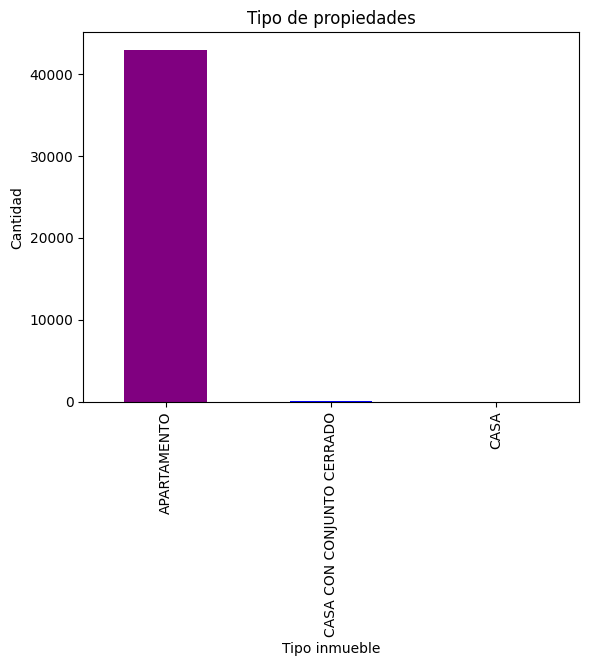

In [246]:
#grafc = habitalpes_df['tipo_propiedad'].value_counts().plot(kind='bar', color=['pink', 'blue'])

grafs = habitalpes_df['tipo_propiedad'].value_counts().plot(kind='bar', color=['purple', 'blue', 'orange'])
plt.title("Tipo de propiedades")
plt.xlabel("Tipo inmueble")
plt.ylabel("Cantidad")


Text(0, 0.5, 'Cantidad')

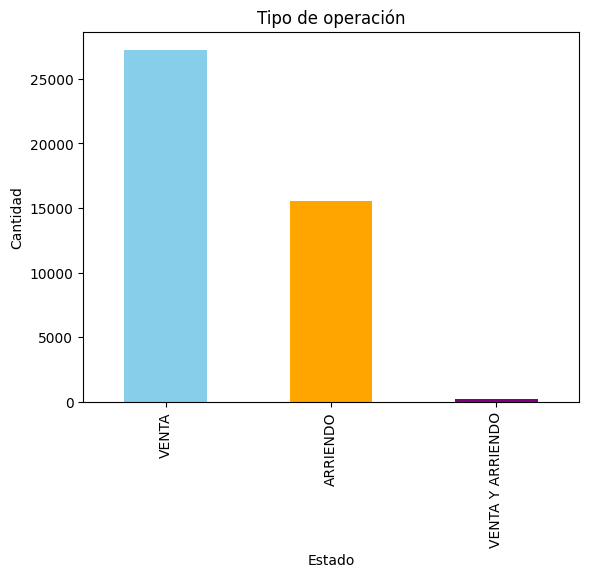

In [247]:
grafs = habitalpes_df['tipo_operacion'].value_counts().plot(kind='bar', color=['skyblue', 'orange', 'purple'])
plt.title("Tipo de operación")
plt.xlabel("Estado")
plt.ylabel("Cantidad")


Text(0, 0.5, 'Cantidad')

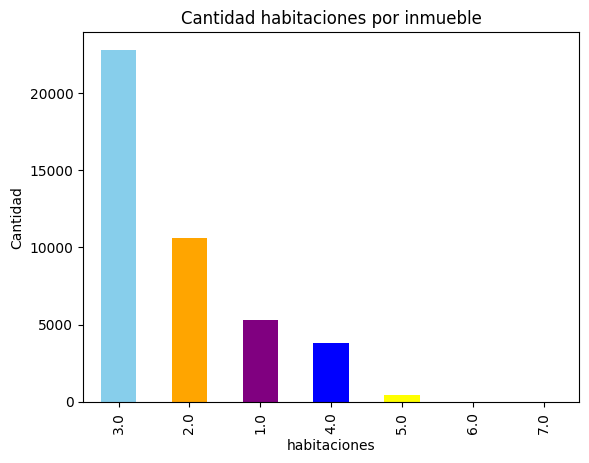

In [248]:
grafs = habitalpes_df['habitaciones'].value_counts().plot(kind='bar', color=['skyblue', 'orange', 'purple', 'blue', 'yellow' ])
plt.title("Cantidad habitaciones por inmueble")
plt.xlabel("habitaciones")
plt.ylabel("Cantidad")

Text(0, 0.5, 'Cantidad')

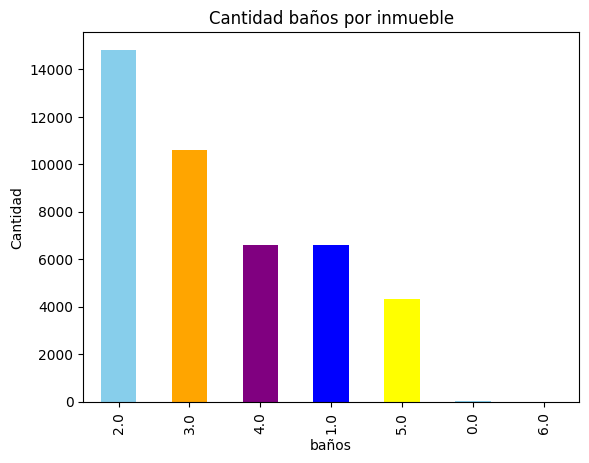

In [249]:
grafs = habitalpes_df['banos'].value_counts().plot(kind='bar', color=['skyblue', 'orange', 'purple', 'blue', 'yellow' ])
plt.title("Cantidad baños por inmueble")
plt.xlabel("baños")
plt.ylabel("Cantidad")

Text(0, 0.5, 'Cantidad')

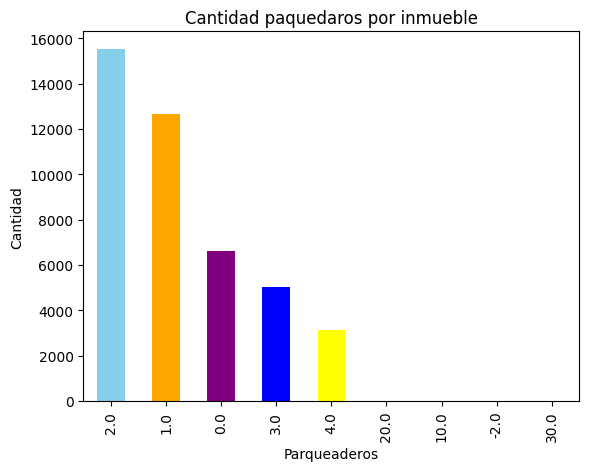

In [250]:
grafs = habitalpes_df['parqueaderos'].value_counts().plot(kind='bar', color=['skyblue', 'orange', 'purple', 'blue', 'yellow' ])
plt.title("Cantidad paquedaros por inmueble")
plt.xlabel("Parqueaderos")
plt.ylabel("Cantidad")

Revisar este atributo debido que hay valores que anomalos para el contexto.

Text(0, 0.5, 'Cantidad')

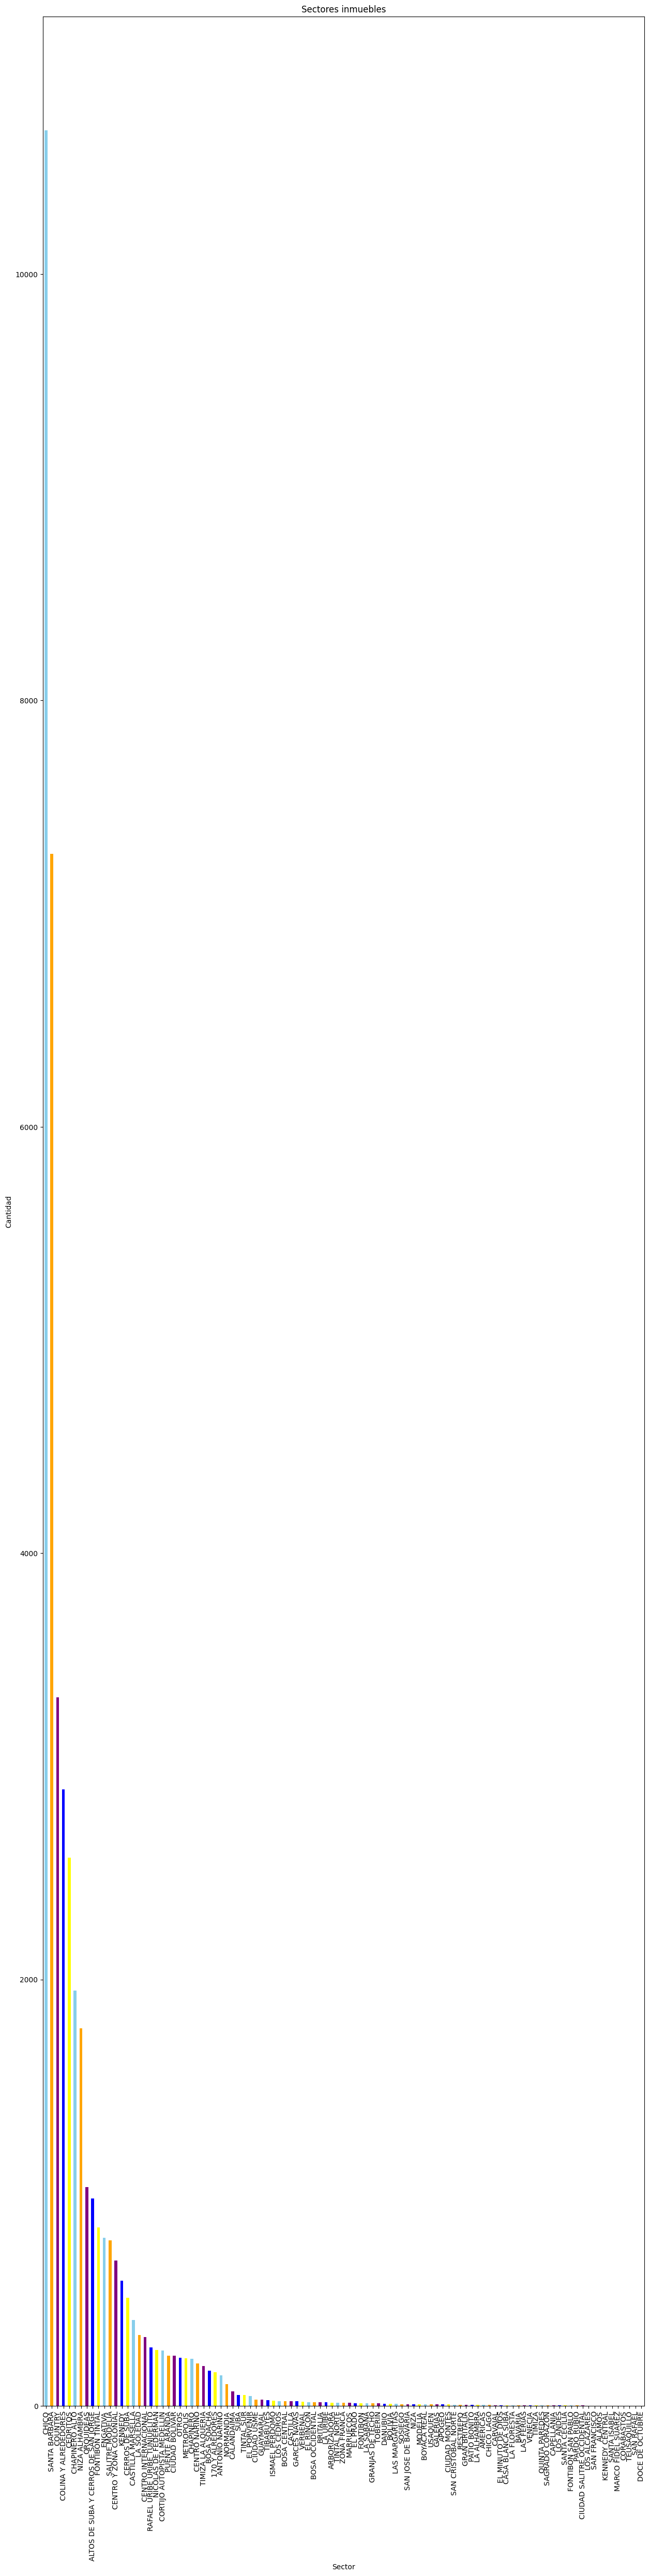

In [251]:
plt.figure(figsize=(15,60))
grafs = habitalpes_df['sector'].value_counts().plot(kind='bar', color=['skyblue', 'orange', 'purple', 'blue', 'yellow' ])

plt.title("Sectores inmuebles")
plt.xlabel("Sector")
plt.ylabel("Cantidad")





Text(0, 0.5, 'Cantidad')

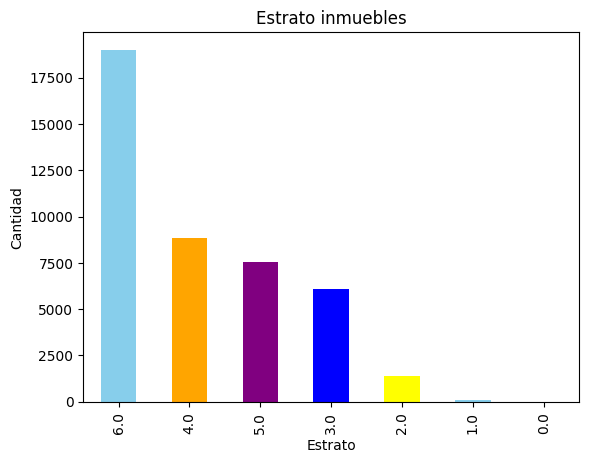

In [252]:
grafs = habitalpes_df['estrato'].value_counts().plot(kind='bar', color=['skyblue', 'orange', 'purple', 'blue', 'yellow' ])

plt.title("Estrato inmuebles")
plt.xlabel("Estrato")
plt.ylabel("Cantidad")


Text(0, 0.5, 'Cantidad')

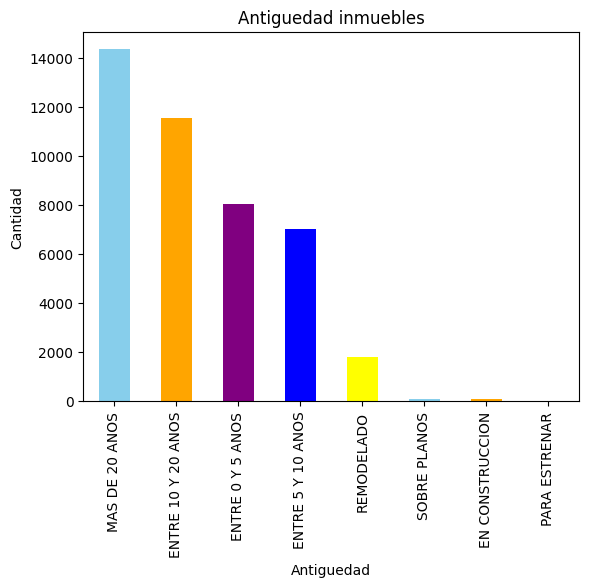

In [253]:
grafs = habitalpes_df['antiguedad'].value_counts().plot(kind='bar', color=['skyblue', 'orange', 'purple', 'blue', 'yellow' ])

plt.title("Antiguedad inmuebles")
plt.xlabel("Antiguedad")
plt.ylabel("Cantidad")

Text(0, 0.5, 'Cantidad')

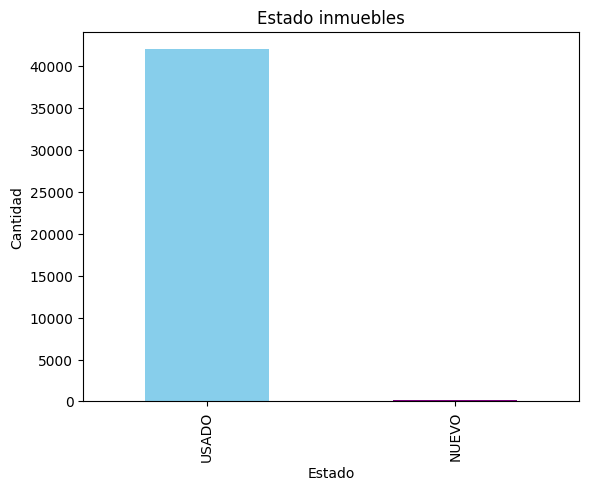

In [254]:
grafs = habitalpes_df['estado'].value_counts().plot(kind='bar', color=['skyblue', 'purple' ])

plt.title("Estado inmuebles")
plt.xlabel("Estado")
plt.ylabel("Cantidad")

In [255]:
grafs = habitalpes_df['gimnasio'].value_counts().plot(kind='bar', color=['skyblue', 'purple' ])
#Tenemos 0 y 1 pero en el diccionario de datos no tenemos espeficicado el significado de los números como tal
#Se tomora el 0 Como NO hay gimnasio y el 1 como SI hay gimnasio
plt.title("Gimnasio inmuebles")
plt.xlabel("Gimnasio")
plt.ylabel("Cantidad")

Text(0, 0.5, 'Cantidad')

Text(0, 0.5, 'Cantidad')

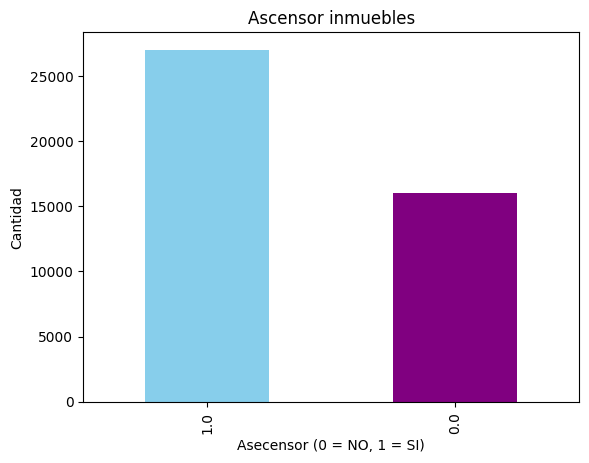

In [256]:
grafs = habitalpes_df['ascensor'].value_counts().plot(kind='bar', color=['skyblue', 'purple' ])
#Tenemos 0 y 1 pero en el diccionario de datos no tenemos espeficicado el significado de los números como tal
#Se tomora el 0 Como NO hay ascensor y el 1 como SI hay ascensor
plt.title("Ascensor inmuebles")
plt.xlabel("Asecensor (0 = NO, 1 = SI)")
plt.ylabel("Cantidad")

Text(0, 0.5, 'Cantidad')

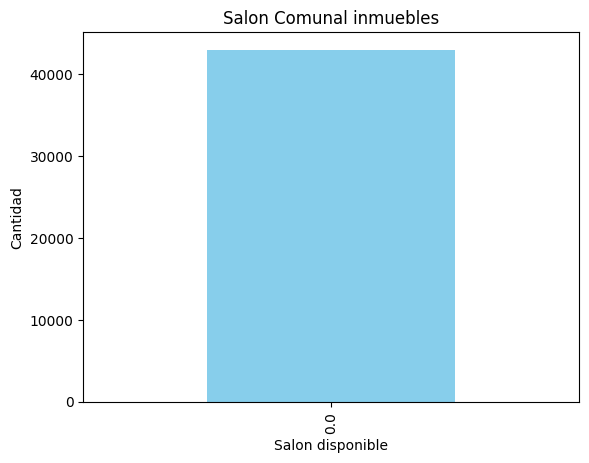

In [257]:
grafs = habitalpes_df['salon_comunal'].value_counts().plot(kind='bar', color=['skyblue', 'purple' ])
#Tenemos 0 y 1 pero en el diccionario de datos no tenemos espeficicado el significado de los números como tal
#Se tomora el 0 Como NO hay salon comunal y el 1 como SI hay comunal
plt.title("Salon Comunal inmuebles")
plt.xlabel("Salon disponible")
plt.ylabel("Cantidad")

Text(0, 0.5, 'Cantidad')

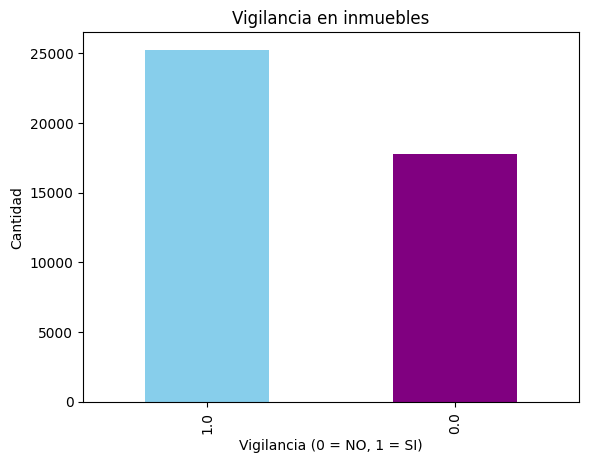

In [258]:
grafs = habitalpes_df['vigilancia'].value_counts().plot(kind='bar', color=['skyblue', 'purple' ])
#Tenemos 0 y 1 pero en el diccionario de datos no tenemos espeficicado el significado de los números como tal
#Se tomora el 0 Como NO hay vigilancia y el 1 como SI hay vigilancia
plt.title("Vigilancia en inmuebles")
plt.xlabel("Vigilancia (0 = NO, 1 = SI)")
plt.ylabel("Cantidad")

In [259]:
plt.figure(figsize=(150,15))
grafs = habitalpes_df['barrio'].value_counts().plot(kind='bar', color=['skyblue', 'purple', 'orange', 'blue', 'yellow' ])


plt.title("Barrios inmuebles")
plt.tick_params(axis='x', labelsize=5)
plt.xlabel("Barrios")
plt.ylabel("Cantidad")

Text(0, 0.5, 'Cantidad')

Text(0, 0.5, 'Cantidad')

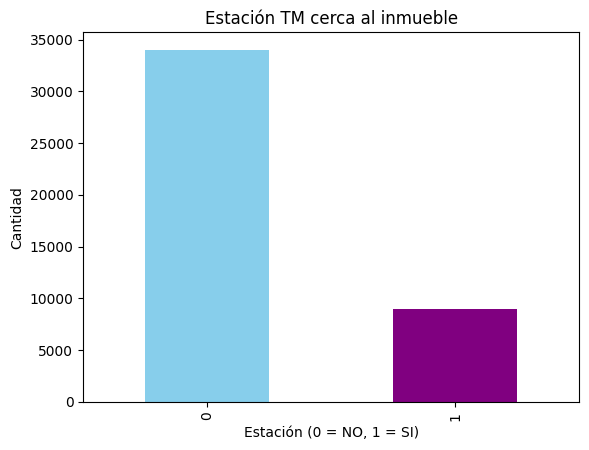

In [260]:

grafs = habitalpes_df['is_cerca_estacion_tm'].value_counts().plot(kind='bar', color=['skyblue', 'purple' ])
#Tenemos 0 y 1 pero en el diccionario de datos no tenemos espeficicado el significado de los números como tal
#Se tomora el 0 Como NO hay Estación TM y el 1 como SI hay Estación TM
plt.title("Estación TM cerca al inmueble")
plt.xlabel("Estación (0 = NO, 1 = SI)")
plt.ylabel("Cantidad")

Text(0, 0.5, 'Cantidad')

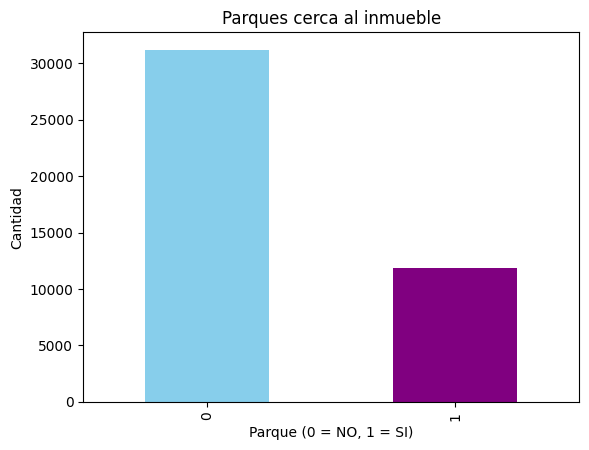

In [261]:

grafs = habitalpes_df['is_cerca_parque'].value_counts().plot(kind='bar', color=['skyblue', 'purple' ])
#Tenemos 0 y 1 pero en el diccionario de datos no tenemos espeficicado el significado de los números como tal
#Se tomora el 0 Como NO hay parque y el 1 como SI hay parque
plt.title("Parques cerca al inmueble")
plt.xlabel("Parque (0 = NO, 1 = SI)")
plt.ylabel("Cantidad")

Columnas exploración Precio arriendo, precio venta, arriendo y área



ATRIBUTO ÁREA

In [262]:
#Media de la columna de area
mean_area= habitalpes_df['area'].mean()
print(f"Media area: {mean_area}")

Media area: 180.03405981912445


In [263]:
#Mediana de la columna area
median_area = habitalpes_df['area'].median()
print(f"Mediana area: {median_area}")

Mediana area: 100.0


In [264]:
#Moda de la columna area
mode_area = habitalpes_df['area'].mode()[0]
print(f"Moda area: {mode_area}")

Moda area: 60.0


ATRIBUTO PRECIO VENTA

In [265]:
#Mediana - promedio de la columna de precio_venta
habitalpes_df['precio_venta'] = habitalpes_df['precio_venta'].apply(lambda x: str(x).replace('$', '').replace(',', '') if pd.notnull(x) else x).astype(float)
median_precio_venta = habitalpes_df['precio_venta'].median()


# Formato para imprimir el resultado con decimales
styled_mean = "${:,.2f}".format(median_precio_venta)
print(f"Average sale price: {styled_mean}")

Average sale price: $700,000,000.00


In [266]:
#Mediana de la columna precio_venta
median_precio_venta = habitalpes_df['precio_venta'].median()
print(f"Mediana de precio_venta: {median_precio_venta}")

Mediana de precio_venta: 700000000.0


In [267]:
# Moda - promedio de la columna de precio_venta
habitalpes_df['precio_venta'] = habitalpes_df['precio_venta'].apply(lambda x: str(x).replace('$', '').replace(',', '') if pd.notnull(x) else x).astype(float)
mode_precio_venta = habitalpes_df['precio_venta'].mode()[0]


# Formato para imprimir el resultado con decimales
styled_mean = "${:,.2f}".format(mode_precio_venta)
print(f"Average sale price: {styled_mean}")

Average sale price: $1,200,000,000.00


In [268]:
#Moda de la columna precio_venta
mode_precio_venta = habitalpes_df['precio_venta'].mode()[0]
print(f"Moda de precio_venta: {mode_precio_venta}")

Moda de precio_venta: 1200000000.0


ATRIBUTO PRECIO ADMINISTRACIÓN

In [269]:
#Media de la columna de administracion
mean_administracion = habitalpes_df['administracion'].mean()
print(f"administracion: {mean_administracion}")

administracion: 4059551.312756498


In [270]:
#Mediana de la columna administracion
median_administracion = habitalpes_df['administracion'].median()
print(f"Mediana de administracion: {median_administracion}")

Mediana de administracion: 650000.0


In [271]:
#Moda de la columna administracion
mode_administracion = habitalpes_df['administracion'].mode()[0]
print(f"Moda de administracion: {mode_administracion}")

Moda de administracion: 1000000.0


In [272]:
# Moda - promedio de la columna de administracion
habitalpes_df['administracion'] = habitalpes_df['administracion'].apply(lambda x: str(x).replace('$', '').replace(',', '') if pd.notnull(x) else x).astype(float)
mode_administracion = habitalpes_df['administracion'].mode()[0]


# Formato para imprimir el resultado con decimales
styled_mean = "${:,.2f}".format(mode_administracion)
print(f"Average sale price: {styled_mean}")

Average sale price: $1,000,000.00


Conclusiones iniciales:


* El tipo de inmueble más común es: apartamento
* La mayoría de inmuebles están a la venta, tienden a tener 3 habitaciones, 2 baños y 2 parqueaderos.
* El sector con la mayor cantidad de inmuebles de habitantes es chico, le siguen Santa Bárbara y el Country.
* Los barrios más populares de los inmuebles fueron s.c chicó norte, s. c. el chico y santa bárbara occidental.
* Los estratos más frecuentes fueron 6, 4 y 5, en ese orden respectivo.
* La antigüedad de los inmuebles en su mayoría fue de más de 20 años, lo cual es acorde que el estado también en su mayoría es de USADO.
* El resto de características básicas encontramos que la mayoría de inmuebles no cuentan con gimnasio o salón común, sin embargo si tienen ascensor y vigilancia.
* Respecto a transporte, la mayoría no se encuentra cerca a una estación de transmilenio. Asimismo, se encontró que tampoco están cerca a un parque o zona.
* Los atributos de área demostró que moda es 60 mts, administración es de $1.000.000 COL, arriendo $1.200.000 COL y de venta $1,200,000,000.00 COL.



#**[20%] ENTRENAMIENTO DEL MODELO DE MACHINE LEARNING:**

*   El conjunto de entrenamiento (train) para ajustar los hiperparámetros de los modelos.
*   El conjunto de prueba (test) para seleccionar el mejor modelo.
*   El conjunto de validación (validation) para realizar el análisis de resultados del modelo seleccionado


**Contextualización**

Con el fin de avanzar con el modelo, se tomó la decisión de depurar algunos atributos del dataset, ya que un número excesivo de columnas afecta la granularidad y puede introducir ruido en el análisis. Las columnas relacionadas con jacuzzi, piso, closets y chimenea no serán consideradas debido a que la mayoría de sus valores son cero o nulos, y además no aportan información relevante para los objetivos del modelo.

Asimismo, se eliminarán las columnas que indican los nombres de estaciones de TransMilenio y parques cercanos al inmueble. Aunque estos atributos podrían tener valor estratégico, la variable sector ya proporciona la información necesaria para capturar la localización y el contexto urbano, por lo que mantener ambas fuentes de información resultaría redundante.


In [273]:
#Exploración y descripción inicial del dataset - Repaso debido que el analisis ya se realizo.
#Nuevo dataset con los atributos relevantes para el modelo.
columnas = [
    'tipo_propiedad',
    'tipo_operacion',
    'precio_venta',
    'area',
    'habitaciones',
    'banos',
    'administracion',
    'parqueaderos',
    'sector',
    'estrato',
    'antiguedad',
    'estado',
    'precio_arriendo',
    'gimnasio',
    'ascensor',
    'salon_comunal',
    'vigilancia',
    'is_cerca_estacion_tm',
    'is_cerca_parque',
]

df = habitalpes_df[columnas].copy()

df.head()


tipo_propiedad tipo_operacion  precio_venta  area  habitaciones  banos  \
0    APARTAMENTO          VENTA   339000000.0  76.0           3.0    2.0   
1    APARTAMENTO          VENTA   223000000.0  63.0           3.0    2.0   
2    APARTAMENTO          VENTA   440898168.0  54.0           3.0    2.0   
3    APARTAMENTO          VENTA   158000000.0  43.0           2.0    2.0   
4    APARTAMENTO          VENTA   222800000.0  48.0           3.0    2.0   

   administracion  parqueaderos               sector  estrato  \
0        300000.0           1.0             BRITALIA      3.0   
1             NaN           0.0  SAN CRISTOBAL NORTE      3.0   
2        305000.0           0.0            LA SABANA      3.0   
3        106600.0           0.0            TIBABUYES      2.0   
4        151000.0           0.0             VERBENAL      3.0   

           antiguedad estado  precio_arriendo  gimnasio  ascensor  \
0  ENTRE 10 Y 20 ANOS    NaN              NaN       0.0       0.0   
1      MAS DE 20 ANOS    NaN              NaN       0.0       0.0   
2    ENTRE 0 Y 5 ANOS    NaN              NaN       0.0       0.0   
3  ENTRE 10 Y 20 ANOS    NaN              NaN       0.0       0.0   
4      MAS DE 20 ANOS    NaN              NaN       0.0       0.0   

   salon_comunal  vigilancia  is_cerca_estacion_tm  is_cerca_parque  
0            0.0         0.0                     0                1  
1            0.0         0.0                     0                1  
2            0.0         0.0                     1                0  
3            0.0         0.0                     0                0  
4            0.0         0.0                     0                0

In [274]:
#Modelo - ML
#Descripción general del nuevo DATASET

import matplotlib.pyplot as plt
import seaborn as sns

# Información básica del dataset
print('Dimensiones del dataset (filas, columnas):', df.shape)
print('\nTipos de datos:')
print(df.dtypes)
print('\nValores nulos por columna:')
print(df.isnull().sum())
print('\nEstadísticas descriptivas:')
print(df.describe())

Dimensiones del dataset (filas, columnas): (43013, 19)

Tipos de datos:
tipo_propiedad           object
tipo_operacion           object
precio_venta            float64
area                    float64
habitaciones            float64
banos                   float64
administracion          float64
parqueaderos            float64
sector                   object
estrato                 float64
antiguedad               object
estado                   object
precio_arriendo         float64
gimnasio                float64
ascensor                float64
salon_comunal           float64
vigilancia              float64
is_cerca_estacion_tm      int64
is_cerca_parque           int64
dtype: object

Valores nulos por columna:
tipo_propiedad              0
tipo_operacion              0
precio_venta            15429
area                        0
habitaciones                1
banos                       1
administracion           7925
parqueaderos                1
sector                   1641
estrato 

**EDA - Limpieza y preprocesamiento**

In [275]:
# Histogramas de variables numéricas
# Columnas numericas: precio_venta, area, habitaciones, banos, administracion, estrato, parqueaderos y precio_arriendo
# Columnas: precio_arriendo, is_cerca_estacion_tm, gimnasio, ascensor, salon_comunal y vigilancia son tipo númericas pero actuan como booleano, asi que no van a ser incluidas.

columnas_numericas = ['precio_venta', 'area', 'habitaciones', 'banos', 'administracion', 'parqueaderos', 'precio_arriendo', 'estrato']
df[columnas_numericas].hist(bins=30, figsize=(12,10), color='#1b9e77')
plt.tight_layout()
plt.suptitle('Distribución de variables numéricas', y=1.02)
plt.show()

**Graficas de Correlación**

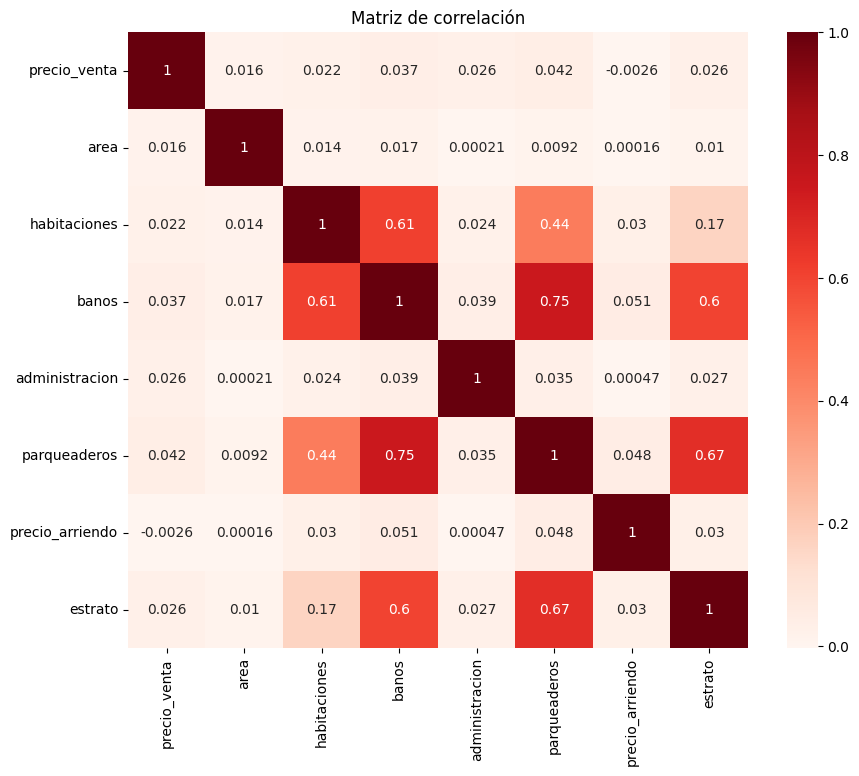

In [276]:
# Matriz de correlación de variables numéricas
import numpy as np
correlation = df[columnas_numericas].corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation, annot=True, cmap='Reds')
plt.title('Matriz de correlación')
plt.show()

In [277]:
# Distribución de variables categoricas
# Columnas: tipo_propiedad, tipo_operacion, sector, antiguedad, estado

print("Available columns:", df.columns.tolist())

# Then use the correct column names
sns.scatterplot(
    data=df,
    x='tipo_propiedad',  # Use the exact column name from your DataFrame
    y="tipo_operacion",  # Without extra spaces
    size= 'area',
    legend=False,
    sizes=(20, 2000)
)

plt.show()

Available columns: ['tipo_propiedad', 'tipo_operacion', 'precio_venta', 'area', 'habitaciones', 'banos', 'administracion', 'parqueaderos', 'sector', 'estrato', 'antiguedad', 'estado', 'precio_arriendo', 'gimnasio', 'ascensor', 'salon_comunal', 'vigilancia', 'is_cerca_estacion_tm', 'is_cerca_parque']


**Identifiación - Sesgos entre variables y atributos**

In [278]:
#Sesgo columna categorica - Sector y cantidad de valores en el dataset
plt.figure(figsize=(70,25))
sns.countplot(data=df, x='sector')
plt.xticks(rotation=90)
plt.show()

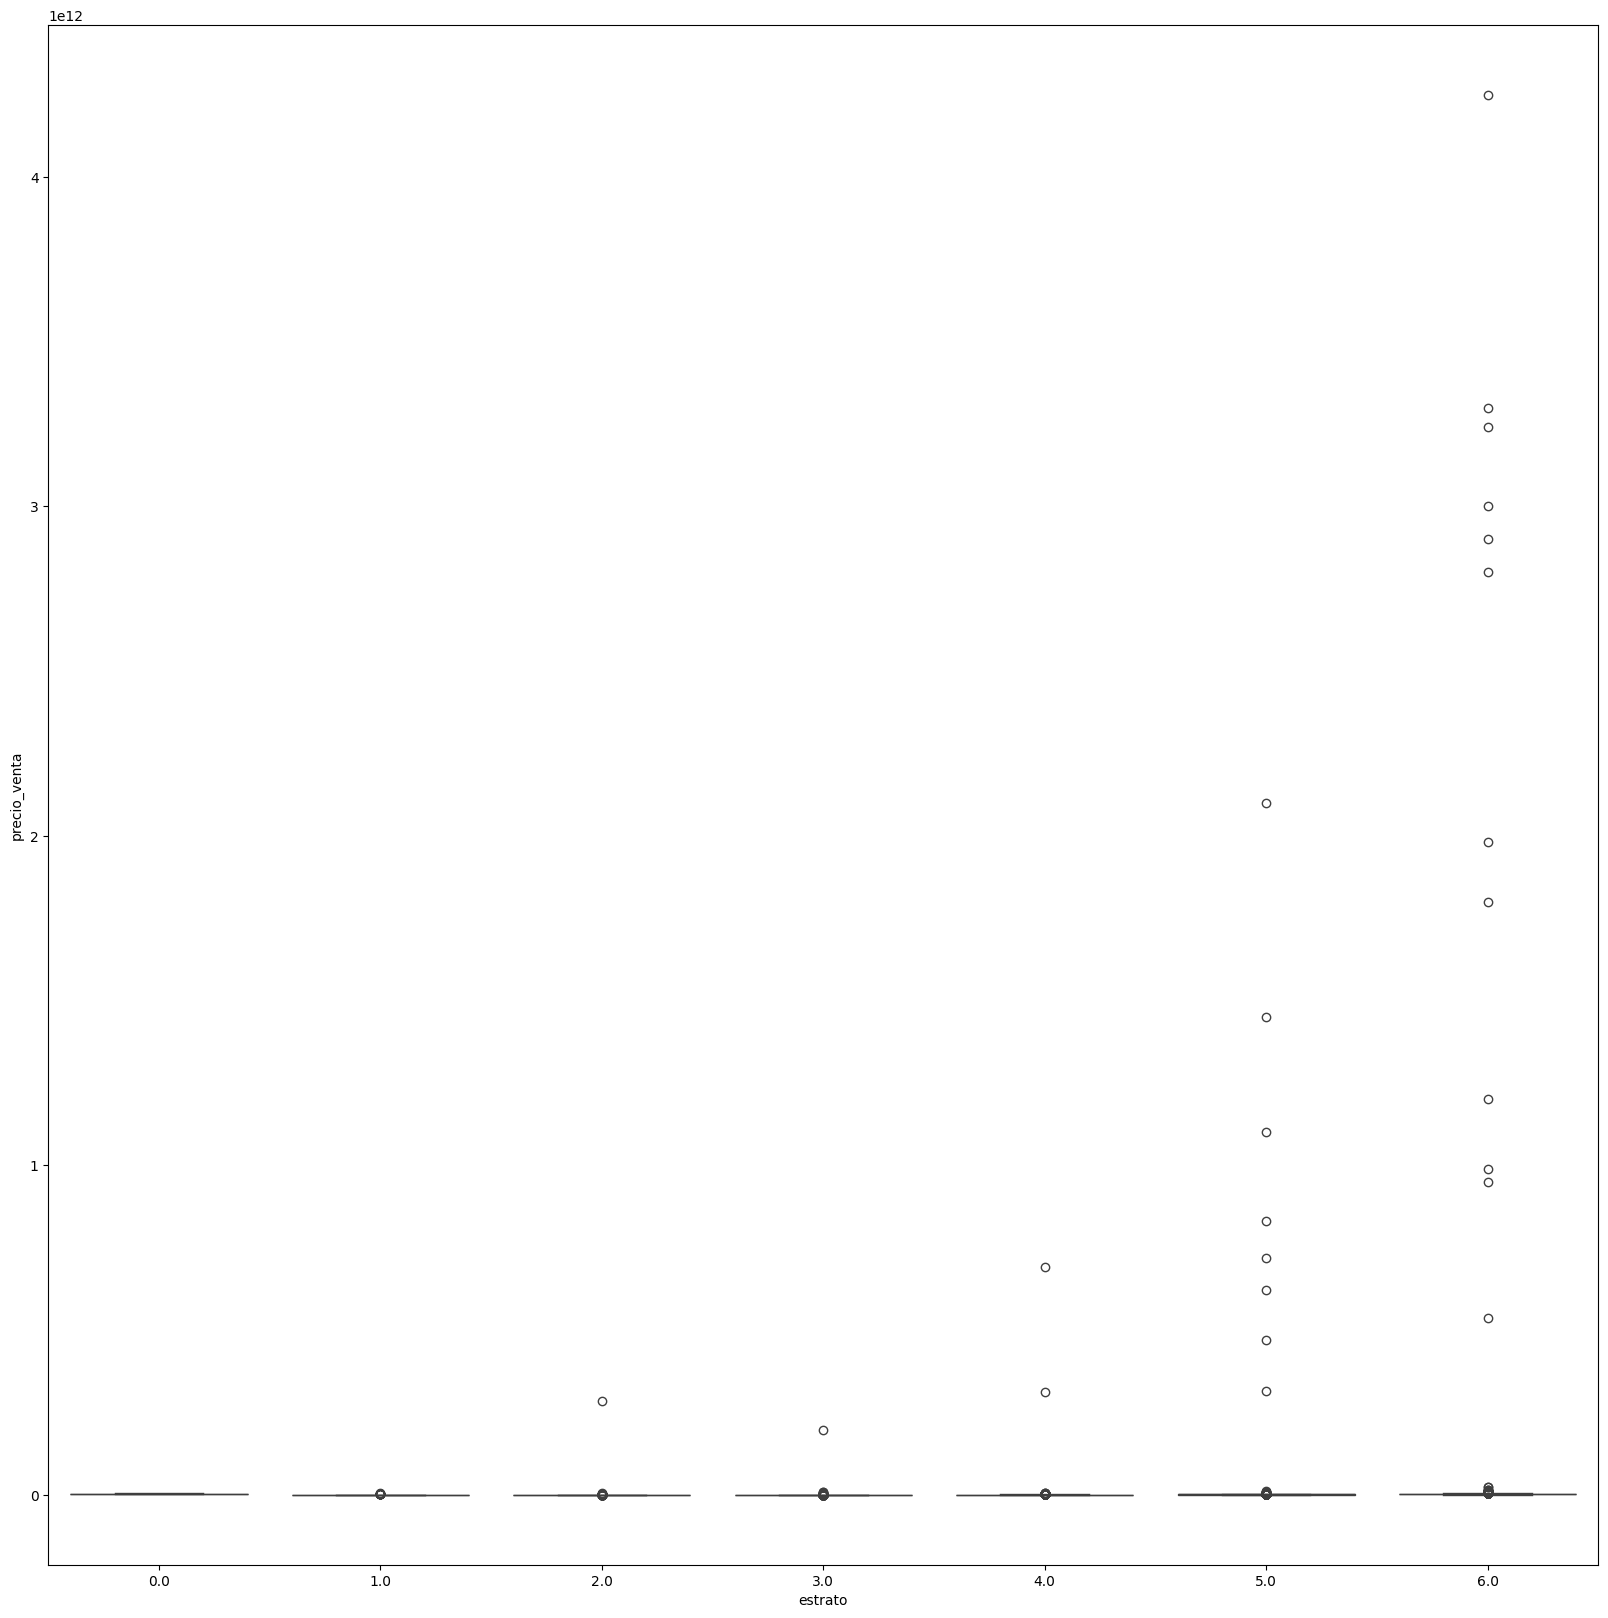

In [279]:
#Sesgo entre estrato y precio
plt.figure(figsize=(20,20))
sns.boxplot(data=df, x='estrato', y='precio_venta')
plt.show()

In [280]:
#Sesgo entre sector y precio de venta
df_temp = df.copy()
df_temp['sector_enc'] = df_temp.groupby('sector')['precio_venta'].transform('mean')
df_temp[['sector_enc', 'precio_venta']].corr()

sector_enc  precio_venta
sector_enc      1.000000      0.031451
precio_venta    0.031451      1.000000

In [281]:
#Sesgo entre sector y precio de arriendo
df_temp = df.copy()
df_temp['sector_enc'] = df_temp.groupby('sector')['precio_arriendo'].transform('mean')
df_temp[['sector_enc', 'precio_arriendo']].corr()

sector_enc  precio_arriendo
sector_enc         1.000000         0.050701
precio_arriendo    0.050701         1.000000

**Limpieza y preprocesamiento**

In [282]:
# 1. Identificación de valores nulos
print('Valores nulos por columna:')
print(df.isnull().sum())

# 2. Eliminación de registros duplicados
duplicados = df.duplicated().sum()
print(f'Número de filas duplicadas: {duplicados}')
df = df.drop_duplicates()

# 3. Ajuste los tipos de datos - Primero variables tipo object se van a convertir en category
df['tipo_propiedad'] = df['tipo_propiedad'].astype('category')
df['tipo_operacion'] = df['tipo_operacion'].astype('category')
df['sector'] = df['sector'].astype('category')
df['antiguedad'] = df['antiguedad'].astype('category')
df['estado'] = df['estado'].astype('category')

# 3.1 Ajuste los tipos de datos - Variables float que funcionan mejor como Int, se manejan numeros enteros.
df['habitaciones'] = df['habitaciones'].astype('Int64')
df['parqueaderos'] = df['parqueaderos'].astype('Int64')
df['banos'] = df['banos'].astype('Int64')
df['estrato'] = df['estrato'].astype('Int64')

# 3.2. Columnas con valores que se puden interpretar como booleanos pero mejor procesamiento del modelo son mejor como Int (0,1)
df['gimnasio'] = df['gimnasio'].astype('Int64')
df['ascensor'] = df['ascensor'].astype('Int64')
df['salon_comunal'] = df['salon_comunal'].astype('Int64')
df['vigilancia'] = df['vigilancia'].astype('Int64')

print('\nTipos de datos después del ajuste:')
print(df.dtypes)

Valores nulos por columna:
tipo_propiedad              0
tipo_operacion              0
precio_venta            15429
area                        0
habitaciones                1
banos                       1
administracion           7925
parqueaderos                1
sector                   1641
estrato                     1
antiguedad                 10
estado                    796
precio_arriendo         27184
gimnasio                    2
ascensor                    2
salon_comunal               2
vigilancia                  2
is_cerca_estacion_tm        0
is_cerca_parque             0
dtype: int64
Número de filas duplicadas: 1522

Tipos de datos después del ajuste:
tipo_propiedad          category
tipo_operacion          category
precio_venta             float64
area                     float64
habitaciones               Int64
banos                      Int64
administracion           float64
parqueaderos               Int64
sector                  category
estrato                 

In [283]:
print(df.columns)

Index(['tipo_propiedad', 'tipo_operacion', 'precio_venta', 'area',
       'habitaciones', 'banos', 'administracion', 'parqueaderos', 'sector',
       'estrato', 'antiguedad', 'estado', 'precio_arriendo', 'gimnasio',
       'ascensor', 'salon_comunal', 'vigilancia', 'is_cerca_estacion_tm',
       'is_cerca_parque'],
      dtype='object')


In [284]:
df.head(50)

tipo_propiedad tipo_operacion  precio_venta   area  \
0                 APARTAMENTO          VENTA   339000000.0   76.0   
1                 APARTAMENTO          VENTA   223000000.0   63.0   
2                 APARTAMENTO          VENTA   440898168.0   54.0   
3                 APARTAMENTO          VENTA   158000000.0   43.0   
4                 APARTAMENTO          VENTA   222800000.0   48.0   
5                 APARTAMENTO          VENTA   128900000.0   47.0   
6                 APARTAMENTO          VENTA   190000000.0   38.0   
7                 APARTAMENTO          VENTA   149000000.0   37.0   
8                 APARTAMENTO          VENTA   350000000.0   51.0   
9   CASA CON CONJUNTO CERRADO          VENTA   190000000.0   57.0   
10  CASA CON CONJUNTO CERRADO          VENTA   226604237.0   63.0   
11                APARTAMENTO          VENTA   480000000.0   70.0   
12                APARTAMENTO          VENTA   291750503.0   73.0   
13  CASA CON CONJUNTO CERRADO          VENTA   720000000.0  170.0   
14                APARTAMENTO          VENTA   381000000.0   47.0   
15                APARTAMENTO          VENTA   269000000.0   61.0   
16                       CASA          VENTA   490000000.0  126.0   
17                APARTAMENTO          VENTA   423300000.0   86.0   
18                       CASA          VENTA   450000000.0   45.0   
19                APARTAMENTO          VENTA   486000000.0   96.0   
20                APARTAMENTO          VENTA   180000000.0   50.0   
21                APARTAMENTO          VENTA   130000000.0   47.0   
22                APARTAMENTO          VENTA   353758000.0   50.0   
23                APARTAMENTO          VENTA   321200000.0   68.0   
24                APARTAMENTO          VENTA   305000000.0   64.0   
25                APARTAMENTO          VENTA   139000000.0   47.0   
26                APARTAMENTO          VENTA    95000000.0   38.0   
27                APARTAMENTO          VENTA   615000000.0  143.0   
28                APARTAMENTO          VENTA   175400000.0   43.0   
29                APARTAMENTO          VENTA   344700000.0   89.0   
30                APARTAMENTO          VENTA   317860000.0   58.0   
31                APARTAMENTO          VENTA   139360000.0   42.0   
32                APARTAMENTO          VENTA   192000000.0   39.0   
33                APARTAMENTO          VENTA   550000000.0   89.0   
34                APARTAMENTO          VENTA   158690000.0   52.0   
35                APARTAMENTO          VENTA   353800000.0   63.0   
36                APARTAMENTO          VENTA   117000000.0   42.0   
37                APARTAMENTO          VENTA   195350000.0   42.0   
38                APARTAMENTO          VENTA   128100000.0   45.0   
39                APARTAMENTO          VENTA   118500000.0   36.0   
40                APARTAMENTO          VENTA   270000000.0   69.0   
41                APARTAMENTO          VENTA   170500000.0   57.0   
42                APARTAMENTO          VENTA   231800000.0   40.0   
43                APARTAMENTO          VENTA   181333333.0   45.0   
44  CASA CON CONJUNTO CERRADO          VENTA   213696256.0   68.0   
45                APARTAMENTO          VENTA   127069414.0   44.0   
46                APARTAMENTO          VENTA   527400000.0   70.0   
47                APARTAMENTO          VENTA   198411512.0   29.0   
48                APARTAMENTO          VENTA   398000000.0   78.0   
49                APARTAMENTO          VENTA   131500000.0   45.0   

    habitaciones  banos  administracion  parqueaderos               sector  \
0              3      2        300000.0             1             BRITALIA   
1              3      2             NaN             0  SAN CRISTOBAL NORTE   
2              3      2        305000.0             0            LA SABANA   
3              2      2        106600.0             0            TIBABUYES   
4              3      2        151000.0             0             VERBENAL   
5              2      1    

**Capado de Valores - Columnas númericas / outliers (valores extremos)**



Capado - Precio Venta (CLIPPING)

In [285]:
df['precio_venta'].describe()

count    2.666500e+04
mean     2.415891e+09
std      5.669350e+10
min      1.000000e+06
25%      4.100000e+08
50%      7.150000e+08
75%      1.350000e+09
max      4.250000e+12
Name: precio_venta, dtype: float64

Gráfica - Boxplot de Precio venta antes del tratamiento

In [286]:
#Gráfica - Boxplot de Precio venta antes del tratamiento
plt.figure(figsize=(8,4))
sns.boxplot(x=df['precio_venta'])
plt.title('Boxplot de Precio Venta antes del tratamiento')
plt.xlabel('Precio Venta')
plt.show()

In [287]:
# Valor maximo de precio de venta $4.250.000.000.000 COP
df['precio_venta'].max()

np.float64(4250000000000.0)

In [288]:
def resumen(col):
    return pd.DataFrame({
        'min': [df[col].min()],
        '1%': [df[col].quantile(0.01)],
        'Q1': [df[col].quantile(0.25)],
        'media': [df[col].mean()],
        'mediana': [df[col].median()],
        'Q3': [df[col].quantile(0.75)],
        '99%': [df[col].quantile(0.99)],
        'max': [df[col].max()]
    })


In [289]:
df.loc[df['precio_venta'] > 1e10, 'precio_venta'] = np.nan

In [290]:
lower = df['precio_venta'].quantile(0.005)
upper = df['precio_venta'].quantile(0.995)

df['precio_venta_capped'] = df['precio_venta'].clip(lower, upper)

In [291]:
df['precio_venta_capped'] = (
    df.groupby('estrato')['precio_venta_capped']
      .transform(lambda x: x.fillna(x.median()))
)

In [292]:
display(resumen('precio_venta_capped'))

min           1%           Q1         media      mediana  \
0  1.121461e+08  140000000.0  435117134.0  9.813483e+08  709000000.0   

             Q3           99%           max  
0  1.350000e+09  4.500000e+09  6.227887e+09

In [293]:
df['precio_venta_capped'].max()

np.float64(6227887200.000032)

In [294]:
df['precio_venta_capped'].isna().sum()

np.int64(1)

In [295]:
df[df['precio_venta_capped'].isna()]


tipo_propiedad tipo_operacion  precio_venta  area  habitaciones  banos  \
391    APARTAMENTO          VENTA   470000000.0  69.0             2      2   

     administracion  parqueaderos       sector  estrato      antiguedad  \
391        547000.0             1  PARDO RUBIO     <NA>  MAS DE 20 ANOS   

    estado  precio_arriendo  gimnasio  ascensor  salon_comunal  vigilancia  \
391    NaN              NaN         0         0              0           0   

     is_cerca_estacion_tm  is_cerca_parque  precio_venta_capped  
391                     0                1                  NaN

In [296]:
df[df['estrato'].isna()]


tipo_propiedad tipo_operacion  precio_venta  area  habitaciones  banos  \
391    APARTAMENTO          VENTA   470000000.0  69.0             2      2   

     administracion  parqueaderos       sector  estrato      antiguedad  \
391        547000.0             1  PARDO RUBIO     <NA>  MAS DE 20 ANOS   

    estado  precio_arriendo  gimnasio  ascensor  salon_comunal  vigilancia  \
391    NaN              NaN         0         0              0           0   

     is_cerca_estacion_tm  is_cerca_parque  precio_venta_capped  
391                     0                1                  NaN

In [297]:
df = df.dropna(subset=['precio_venta_capped', 'estrato'])


In [298]:
df['precio_venta_capped'].isna().sum()

np.int64(0)

Gráfica - Boxplot de Precio venta DESPUES del tratamiento

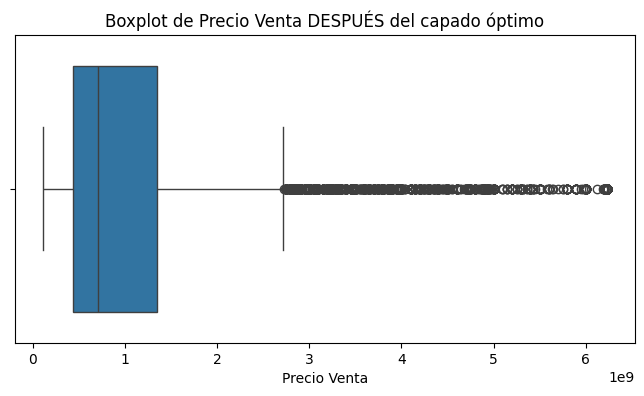

In [299]:
#Gráfica - Boxplot de Precio venta DESPUES del tratamiento
plt.figure(figsize=(8,4))
sns.boxplot(x=df['precio_venta_capped'])
plt.title("Boxplot de Precio Venta DESPUÉS del capado óptimo")
plt.xlabel("Precio Venta")
plt.show()

**Capado - Área (Limites lógicos)**

In [300]:
#Número de Lineas donde el area es igual a 0 mts2
(df['area'] == 0).sum()

np.int64(19)

In [301]:
#Resumen atributo área
display(resumen('area'))

min     1%    Q1       media  mediana     Q3    99%        max
0  0.0  25.04  63.0  182.251205    101.0  175.0  464.0  1900000.0

Gráfica - Boxplot de área antes del tratamiento

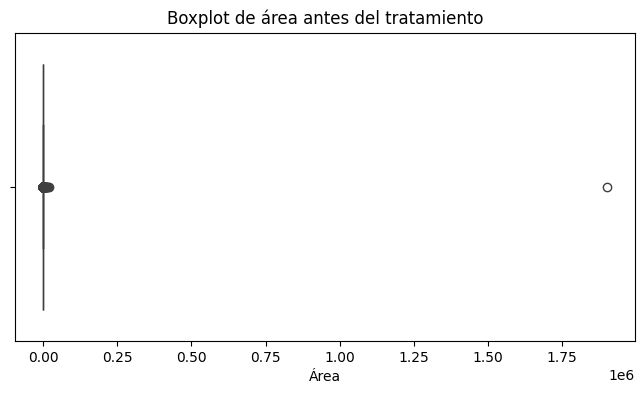

In [302]:
#Gráfica - Boxplot de área antes del tratamiento
plt.figure(figsize=(8,4))
sns.boxplot(x=df['area'])
plt.title('Boxplot de área antes del tratamiento')
plt.xlabel('Área')
plt.show()

**Epxloración columna área:** No pueden existir inmuebles con áreas tan pequeñas, puede afectar al modelo. Se va a tomar 35 mt2 como valor minimo de área para parametro del capado. Bebido a que los valores mas bajos oscilan entre 36 y 35 mts2, por consecuente se va a considerar el 35 mts2 como minimo lógico del muestreo para los valores del modelo.

**Analisis gráfica área antes del tratamiento**: La gráfica muestra el valor del maximo reflado en el punto aislado a la derecha por el valor tan alto presente en el atributo, mientras tanto los demas valores estan apilado cerca al cero, representando de una forma no tan clara los demas valores promedio presentes los cuales se puden llegar confundir con 0 mts2.

* Capado de los valores minimos de área



In [303]:
#Exploración de los valores por debado de 35 mts2 presentes en la columna de área.
df[df['area'] < 35]

tipo_propiedad tipo_operacion  precio_venta   area  habitaciones  banos  \
47       APARTAMENTO          VENTA   198411512.0  29.00             1      1   
108      APARTAMENTO          VENTA   124000000.0  31.00             2      1   
121      APARTAMENTO          VENTA   229965517.0  33.00             1      1   
158      APARTAMENTO          VENTA   124500000.0  34.00             2      1   
169      APARTAMENTO          VENTA   310000000.0  20.00             1      1   
...              ...            ...           ...    ...           ...    ...   
42716    APARTAMENTO          VENTA   185000000.0  33.00             1      1   
42855    APARTAMENTO          VENTA   260000000.0  30.00             1      1   
42872    APARTAMENTO          VENTA   595000000.0  11.00             3      3   
42917    APARTAMENTO          VENTA   265000000.0  28.15             1      1   
42969    APARTAMENTO          VENTA   117000000.0  34.00             2      1   

       administracion  parqueaderos                sector  estrato  \
47           150000.0             0             CHAPINERO        3   
108           88000.0             0          PATIO BONITO        2   
121          136000.0             0             LA SABANA        3   
158           66999.0             0            TINTAL SUR        2   
169          291400.0             0         SANTA BARBARA        5   
...               ...           ...                   ...      ...   
42716        243000.0             1             ORQUIDEAS        3   
42855        230000.0             1  COLINA Y ALREDEDORES        4   
42872        430000.0             2  COLINA Y ALREDEDORES        4   
42917        260500.0             0         NIZA ALHAMBRA        4   
42969         52000.0             0            TINTAL SUR        2   

               antiguedad estado  precio_arriendo  gimnasio  ascensor  \
47       ENTRE 0 Y 5 ANOS    NaN              NaN         0         0   
108    ENTRE 10 Y 20 ANOS    NaN              NaN         0         0   
121      ENTRE 0 Y 5 ANOS    NaN              NaN         0         0   
158    ENTRE 10 Y 20 ANOS    NaN              NaN         0         0   
169      ENTRE 0 Y 5 ANOS    NaN              NaN         0         0   
...                   ...    ...              ...       ...       ...   
42716   ENTRE 5 Y 10 ANOS  USADO              NaN         0         1   
42855    ENTRE 0 Y 5 ANOS  USADO              NaN         1         1   
42872   ENTRE 5 Y 10 ANOS  USADO              NaN         1         1   
42917    ENTRE 0 Y 5 ANOS  USADO              NaN         0         1   
42969  ENTRE 10 Y 20 ANOS    NaN              NaN         0         0   

       salon_comunal  vigilancia  is_cerca_estacion_tm  is_cerca_parque  \
47                 0           0                     1                0   
108                0           0                     1                0   
121                0           0                     1                1   
158                0           0                     0                1   
169                0           0                     0                0   
...              ...         ...                   ...              ...   
42716              0           0                     0                1   
42855              0           1                     1                1   
42872              0           1                     0                1   
42917              0           0                     1                1   
42969              0           0                     0                1   

       precio_venta_capped  
47             198411512.0  
108            124000000.0  
121            229965517.0  
158            124500000.0  
169            310000000.0  
...                    ...  
42716          185000000.0  
42855          260000000.0  
42872          595000000.0  
42917          265000000.0  
42969          117000000.0  

[1401 rows x 20 columns]

In [304]:
#Número de Lineas donde el area es menor a 35 mts2
(df['area'] < 35).sum()

np.int64(1401)

* Capado de los valores máximos de área

In [305]:
#Confirmar el valor maximo en área
df['area'].max()

np.float64(1900000.0)

In [306]:
#Lineas donde el area es mayor a 1.000.000 mts2
df[df['area'] > 1000000]

tipo_propiedad tipo_operacion  precio_venta       area  habitaciones  \
15944    APARTAMENTO       ARRIENDO           NaN  1900000.0             4   

       banos  administracion  parqueaderos sector  estrato  \
15944      5       1900000.0             2  CHICO        6   

               antiguedad estado  precio_arriendo  gimnasio  ascensor  \
15944  ENTRE 10 Y 20 ANOS  USADO       10000000.0         0         0   

       salon_comunal  vigilancia  is_cerca_estacion_tm  is_cerca_parque  \
15944              0           1                     0                1   

       precio_venta_capped  
15944         1.350000e+09

Tenemos un valor maximo de 1.900.000 mts2 para un inmueble, lo cual puede ser factible en un contexto de rural o campestre. Sin embargo esta generando una anomalia en la gráficacion del area como tal. Ahora bien, solo hay un inmuble con esa area, el cual esta catalogado como aptamento en el sector Chico el cual puede ser un error de digitación o en el dataset, ya que los aptamentos de lujo estan oscilando entre 303 mts2 hasta 808mts2 haciendo una breve investigación en Fincaraiz.com.

In [307]:
#Exploración de valores muy altos en la columna de área.
#Lineas donde el area es mayor a 10.000 mts2
df[df['area'] > 10000]

tipo_propiedad tipo_operacion  precio_venta       area  habitaciones  \
14996    APARTAMENTO       ARRIENDO           NaN    13985.0             3   
15944    APARTAMENTO       ARRIENDO           NaN  1900000.0             4   
26675    APARTAMENTO          VENTA  1.200000e+09    19621.0             3   
41575    APARTAMENTO          VENTA  1.080000e+09    15413.0             4   

       banos  administracion  parqueaderos         sector  estrato  \
14996      4       1200000.0             3          CHICO        6   
15944      5       1900000.0             2          CHICO        6   
26675      3       1000000.0             2  SANTA BARBARA        6   
41575      4        950000.0             2  NIZA ALHAMBRA        5   

               antiguedad estado  precio_arriendo  gimnasio  ascensor  \
14996  ENTRE 10 Y 20 ANOS  USADO        9500000.0         1         0   
15944  ENTRE 10 Y 20 ANOS  USADO       10000000.0         0         0   
26675      MAS DE 20 ANOS  USADO              NaN         0         1   
41575  ENTRE 10 Y 20 ANOS  USADO              NaN         1         0   

       salon_comunal  vigilancia  is_cerca_estacion_tm  is_cerca_parque  \
14996              0           1                     1                0   
15944              0           1                     0                1   
26675              0           1                     0                0   
41575              0           1                     1                0   

       precio_venta_capped  
14996         1.350000e+09  
15944         1.350000e+09  
26675         1.200000e+09  
41575         1.080000e+09

In [308]:
#Exploración de valores muy altos en la columna de área.
#Lineas donde el area es mayor a 1000 mts2
df[df['area'] > 1000]

tipo_propiedad tipo_operacion  precio_venta       area  habitaciones  \
4115     APARTAMENTO          VENTA  4.150000e+08     5700.0             2   
4417     APARTAMENTO          VENTA  3.100000e+08     5230.0             3   
5180     APARTAMENTO          VENTA  3.000000e+08     6434.0             3   
7423     APARTAMENTO          VENTA  5.500000e+08     9242.0             3   
8792     APARTAMENTO          VENTA  2.850000e+08     6550.0             3   
10879    APARTAMENTO       ARRIENDO           NaN     1303.0             5   
14748    APARTAMENTO       ARRIENDO           NaN     2020.0             3   
14996    APARTAMENTO       ARRIENDO           NaN    13985.0             3   
15944    APARTAMENTO       ARRIENDO           NaN  1900000.0             4   
18119    APARTAMENTO       ARRIENDO  1.300000e+08     1700.0          <NA>   
21997    APARTAMENTO          VENTA  3.400000e+08     6612.0             3   
24328    APARTAMENTO       ARRIENDO           NaN     1500.0             5   
24488    APARTAMENTO          VENTA  6.590000e+08     1307.0             3   
24683    APARTAMENTO          VENTA  6.800000e+08     9999.0             3   
25873    APARTAMENTO          VENTA  1.600000e+09     1778.0             3   
26675    APARTAMENTO          VENTA  1.200000e+09    19621.0             3   
27411    APARTAMENTO          VENTA  2.700000e+08     5509.0             3   
27471    APARTAMENTO          VENTA  4.400000e+09     7685.0             3   
28915    APARTAMENTO          VENTA  3.000000e+08     3222.0             2   
29180    APARTAMENTO          VENTA  1.100000e+08     3900.0             3   
30587    APARTAMENTO          VENTA           NaN     1550.0             5   
30655    APARTAMENTO          VENTA  7.600000e+09     1421.0             1   
30837    APARTAMENTO          VENTA  3.400000e+08     5186.0             2   
30844    APARTAMENTO          VENTA  6.900000e+09     1514.0             1   
31934    APARTAMENTO       ARRIENDO           NaN     4707.0             1   
33387    APARTAMENTO       ARRIENDO           NaN     4000.0             1   
39473    APARTAMENTO          VENTA  8.500000e+08     7263.0             1   
40350    APARTAMENTO          VENTA  1.850000e+08     5255.0             3   
40681    APARTAMENTO       ARRIENDO           NaN     4700.0             3   
41480    APARTAMENTO          VENTA  6.500000e+08     8726.0             3   
41575    APARTAMENTO          VENTA  1.080000e+09    15413.0             4   
41671    APARTAMENTO          VENTA  8.000000e+08     1180.3             1   

       banos  administracion  parqueaderos  \
4115       2             NaN             4   
4417       2        264400.0             1   
5180       2        170700.0             0   
7423       2        440000.0             1   
8792       2        170000.0             1   
10879      5       4000000.0             4   
14748      1       1900000.0             4   
14996      4       1200000.0             3   
15944      5       1900000.0             2   
18119   <NA>         78000.0          <NA>   
21997      3        337000.0             1   
24328      4             NaN             4   
24488      3        548000.0             2   
24683      3        368000.0             1   
25873      3        822000.0             2   
26675      3       1000000.0             2   
27411      2        150000.0             1   
27471      4             NaN             4   
28915      1        173000.0             0   
29180      1         80000.0             0   
30587      5             NaN             4   
30655      2             NaN             4   
30837      2        223000.0             1   
30844      1             NaN             2   
31934      2        461000.0             1   
33387      1             NaN             0   
39473      2        600000.0             1   
40350      1             NaN             0   
40681      2             NaN             0   
41480      3        915000.0             3   
41575

In [309]:
#Número de Lineas donde el area es mayor a 1000 mts2
(df['area'] > 1000).sum()

np.int64(32)

Como valor máximo, se determinó que 1.000 m² puede considerarse un tope lógico para los inmuebles incluidos en el entrenamiento del modelo. Aunque no existe una normativa oficial que establezca un área máxima para predios en Bogotá, el muestreo de los datos muestra que los inmuebles con áreas superiores a este valor no se alejan significativamente del comportamiento general. Además, el número de registros que superan los 1.000 m² es reducido, por lo que su exclusión no afecta la integridad ni la representatividad del dataset.

In [310]:
#Deteccion de valores invalidados para el modelo (Muy bajos o muy altos para el contexto)
#Se cambian los valores detectados por un NAN
df.loc[df['area'] < 35, 'area'] = np.nan
df.loc[df['area'] > 1000, 'area'] = np.nan

In [311]:
#Remplazo de valores guidos por el estrato de los inmuebles
df['area'] = df.groupby('estrato')['area'].transform(
    lambda x: x.fillna(x.median())
)


In [312]:
display(resumen('area'))

min    1%    Q1       media  mediana     Q3    99%    max
0  35.0  36.0  65.0  133.995115    103.0  175.0  456.0  800.0

In [313]:
df['area'].describe()

count    41490.000000
mean       133.995115
std         93.723110
min         35.000000
25%         65.000000
50%        103.000000
75%        175.000000
max        800.000000
Name: area, dtype: float64

Gráfica - Boxplot de área despues del tratamiento

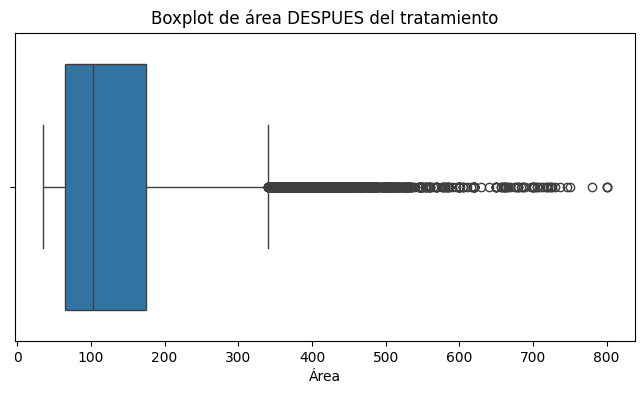

In [314]:
#Gráfica - Boxplot de área DEPUES del tratamiento
plt.figure(figsize=(8,4))
sns.boxplot(x=df['area'])
plt.title('Boxplot de área DESPUES del tratamiento')
plt.xlabel('Área')
plt.show()

Se puede evidenciar la distrubución mas pareja y acorde al contexto real del las áreas documentadas para el entrenamiento del modelo.

**Capado - Administración (CLIPPING)**

In [315]:
#Número de Lineas donde el valor de la administración es igual a $0 COP
(df['administracion'] == 0).sum()

np.int64(0)

In [316]:
df['administracion'].describe()

count    3.383100e+04
mean     4.149020e+06
std      6.878007e+07
min      1.000000e+00
25%      3.500000e+05
50%      6.628000e+05
75%      1.200000e+06
max      3.500000e+09
Name: administracion, dtype: float64

In [317]:
#Resumen atributo Administración
display(resumen('administracion'))

min       1%        Q1         media   mediana         Q3        99%  \
0  1.0  10000.0  350000.0  4.149020e+06  662800.0  1200000.0  3900000.0   

            max  
0  3.500000e+09

Gráfica - Boxplot de administración antes del tratamiento

In [318]:
#Gráfica - Boxplot de administración antes del tratamiento
plt.figure(figsize=(8,4))
sns.boxplot(x=df['administracion'])
plt.title('Boxplot de administración antes del tratamiento')
plt.xlabel('administracion')
plt.show()

En el atributo de administración no existe una normativa que establezca valores mínimos o máximos en el contexto colombiano; este costo depende principalmente del estrato del inmueble y de los servicios que ofrece la copropiedad. No obstante, es importante identificar valores atípicamente bajos, cercanos a $0 COP, ya que podrían corresponder a errores de registro o a inmuebles que no aplican a régimen de propiedad horizontal.

Respecto a los valores máximos, dado que el dataset incluye en su mayoría inmuebles de lujo, es razonable considerar como normales administraciones superiores a $5.000.000 COP. Estos valores altos se encuentran dentro del comportamiento esperado para edificaciones con servicios premium y amplias áreas comunes.

* Capado de los valores minimos de administración

In [319]:
df['administracion'].min()

np.float64(1.0)

In [320]:
df[df['administracion'] < 100000]

tipo_propiedad tipo_operacion  precio_venta  area  \
5                    APARTAMENTO          VENTA   128900000.0  47.0   
10     CASA CON CONJUNTO CERRADO          VENTA   226604237.0  63.0   
12                   APARTAMENTO          VENTA   291750503.0  73.0   
20                   APARTAMENTO          VENTA   180000000.0  50.0   
21                   APARTAMENTO          VENTA   130000000.0  47.0   
...                          ...            ...           ...   ...   
43000                APARTAMENTO          VENTA   133500000.0  38.0   
43002                APARTAMENTO          VENTA   149999000.0  57.0   
43005                APARTAMENTO          VENTA   137000000.0  47.0   
43006                APARTAMENTO          VENTA   121000000.0  35.0   
43007                APARTAMENTO          VENTA   130000000.0  37.0   

       habitaciones  banos  administracion  parqueaderos          sector  \
5                 2      1         86500.0             0      TINTAL SUR   
10                4      2         98000.0             0            SUBA   
12                3      2         50000.0             1        VERBENAL   
20                2      1         84600.0             0       EL RINCON   
21                3      1         78300.0             0      CALANDAIMA   
...             ...    ...             ...           ...             ...   
43000             2      1         68000.0             0      CALANDAIMA   
43002             3      1         54800.0             0  LAS MARGARITAS   
43005             3      1         62000.0             0      TINTAL SUR   
43006             2      1         76200.0             0      CALANDAIMA   
43007             2      1         77000.0             0     EL PORVENIR   

       estrato          antiguedad estado  precio_arriendo  gimnasio  \
5            2  ENTRE 10 Y 20 ANOS    NaN              NaN         0   
10           3  ENTRE 10 Y 20 ANOS    NaN              NaN         0   
12           3  ENTRE 10 Y 20 ANOS    NaN              NaN         0   
20           3      MAS DE 20 ANOS    NaN              NaN         0   
21           2  ENTRE 10 Y 20 ANOS    NaN              NaN         0   
...        ...                 ...    ...              ...       ...   
43000        2  ENTRE 10 Y 20 ANOS    NaN              NaN         0   
43002        2   ENTRE 5 Y 10 ANOS    NaN              NaN         0   
43005        2   ENTRE 5 Y 10 ANOS    NaN              NaN         0   
43006        2  ENTRE 10 Y 20 ANOS    NaN              NaN         0   
43007        2  ENTRE 10 Y 20 ANOS    NaN              NaN         0   

       ascensor  salon_comunal  vigilancia  is_cerca_estacion_tm  \
5             0              0           0                     0   
10            0              0           0                     0   
12            0              0           0                     0   
20            0              0           0                     0   
21            0              0           0                     0   
...         ...            ...         ...                   ...   
43000         0              0           0                     0   
43002         0              0           0                     0   
43005         0              0           0                     0   
43006         0              0           0                     0   
43007         0              0           0                     0   

       is_cerca_parque  precio_venta_capped  
5                    1          128900000.0  
10                   0          226604237.0  
12                   0          291750503.0  
20                   0          180000000.0  
21                   0          130000000.0  
...                ...                  ...  
43000                0          133500000.0  
43002                0          149999000.0  
43005                0          137000000.0  
43006                0          121000000.0  
43007                1          130000000.0  

[1384 rows x 20 c

In [321]:
#Número de Lineas donde el el valor de administracion es menor a $100.000 COP
(df['administracion'] < 100000).sum()

np.int64(1384)

In [322]:
df[df['administracion'] < 50000]

tipo_propiedad tipo_operacion  precio_venta   area  habitaciones  banos  \
26       APARTAMENTO          VENTA  9.500000e+07   38.0             2      1   
247      APARTAMENTO          VENTA  4.658100e+08  114.0             3      3   
262      APARTAMENTO          VENTA  1.030000e+08   46.0             2      1   
284      APARTAMENTO          VENTA  1.018000e+08   46.0             2      1   
288      APARTAMENTO          VENTA  1.620000e+08   57.0             3      1   
...              ...            ...           ...    ...           ...    ...   
42799    APARTAMENTO          VENTA  1.970000e+08   45.0             3      1   
42801    APARTAMENTO          VENTA  2.499000e+08   55.0             1      2   
42802    APARTAMENTO          VENTA  1.760000e+08   46.0             2      1   
42878    APARTAMENTO          VENTA  1.490000e+09  180.0             3      3   
42950    APARTAMENTO          VENTA  1.120000e+08   50.0             3      2   

       administracion  parqueaderos                               sector  \
26            40000.0             0                          CIUDAD USME   
247           40000.0             2                           LOS CEDROS   
262           44000.0             0                          CIUDAD USME   
284           45000.0             0                          CIUDAD USME   
288           46000.0             0                       LAS MARGARITAS   
...               ...           ...                                  ...   
42799         10000.0             0  ALTOS DE SUBA Y CERROS DE SAN JORGE   
42801         10000.0             1                              KENNEDY   
42802         10000.0             0                      FONTIBON TINTAL   
42878           940.0             3                                CHICO   
42950         44000.0             0                          CIUDAD USME   

       estrato          antiguedad estado  precio_arriendo  gimnasio  \
26           2   ENTRE 5 Y 10 ANOS    NaN              NaN         0   
247          5      MAS DE 20 ANOS    NaN              NaN         0   
262          2  ENTRE 10 Y 20 ANOS    NaN              NaN         0   
284          1   ENTRE 5 Y 10 ANOS    NaN              NaN         0   
288          1   ENTRE 5 Y 10 ANOS    NaN              NaN         0   
...        ...                 ...    ...              ...       ...   
42799        3   ENTRE 5 Y 10 ANOS  USADO              NaN         0   
42801        3  ENTRE 10 Y 20 ANOS  USADO              NaN         0   
42802        3   ENTRE 5 Y 10 ANOS  USADO              NaN         0   
42878        6      MAS DE 20 ANOS  USADO        8250000.0         0   
42950        1   ENTRE 5 Y 10 ANOS    NaN              NaN         0   

       ascensor  salon_comunal  vigilancia  is_cerca_estacion_tm  \
26            0              0           0                     0   
247           0              0           0                     0   
262           0              0           0                     0   
284           0              0           0                     0   
288           0              0           0                     0   
...         ...            ...         ...                   ...   
42799         0              0           0                     0   
42801         0              0           0                     0   
42802         0              0           0                     0   
42878         0              0           1                     0   
42950         0              0           0                     0   

       is_cerca_parque  precio_venta_capped  
26                   1         1.121461e+08  
247                  0         4.658100e+08  
262                  1         1.121461e+08  
284                  1         1.121461e+08  
288                  0         1.620000e+08  
...                ...                  ...  
42799                0         1.970000e+08  
42801                0         2.499000e+08  
42802                0  

In [323]:
#Número de Lineas donde el el valor de administracion es menor a $50.000 COP
(df['administracion'] < 50000).sum()

np.int64(560)

In [324]:
df[df['administracion'] < 30000]

tipo_propiedad tipo_operacion  precio_venta   area  habitaciones  banos  \
494      APARTAMENTO          VENTA  1.120000e+08   47.0             2      1   
495      APARTAMENTO          VENTA  1.240000e+08   47.0             2      1   
496      APARTAMENTO          VENTA  1.599000e+08   42.0             2      1   
497      APARTAMENTO          VENTA  1.350000e+08   42.0             3      1   
498      APARTAMENTO          VENTA  3.180556e+08   78.0             3      2   
...              ...            ...           ...    ...           ...    ...   
42796    APARTAMENTO          VENTA  1.150000e+08   47.0             3      1   
42799    APARTAMENTO          VENTA  1.970000e+08   45.0             3      1   
42801    APARTAMENTO          VENTA  2.499000e+08   55.0             1      2   
42802    APARTAMENTO          VENTA  1.760000e+08   46.0             2      1   
42878    APARTAMENTO          VENTA  1.490000e+09  180.0             3      3   

       administracion  parqueaderos                               sector  \
494           10000.0             0                              KENNEDY   
495           10000.0             0                              KENNEDY   
496           10000.0             0                              KENNEDY   
497           10000.0             0                              KENNEDY   
498           10000.0             1                              KENNEDY   
...               ...           ...                                  ...   
42796         10000.0             0                          BOSA SOACHA   
42799         10000.0             0  ALTOS DE SUBA Y CERROS DE SAN JORGE   
42801         10000.0             1                              KENNEDY   
42802         10000.0             0                      FONTIBON TINTAL   
42878           940.0             3                                CHICO   

       estrato          antiguedad estado  precio_arriendo  gimnasio  \
494          2  ENTRE 10 Y 20 ANOS  USADO              NaN         0   
495          2  ENTRE 10 Y 20 ANOS  USADO              NaN         0   
496          2      MAS DE 20 ANOS  USADO              NaN         0   
497          2  ENTRE 10 Y 20 ANOS  USADO              NaN         0   
498          3   ENTRE 5 Y 10 ANOS  USADO              NaN         0   
...        ...                 ...    ...              ...       ...   
42796        2   ENTRE 5 Y 10 ANOS  USADO              NaN         0   
42799        3   ENTRE 5 Y 10 ANOS  USADO              NaN         0   
42801        3  ENTRE 10 Y 20 ANOS  USADO              NaN         0   
42802        3   ENTRE 5 Y 10 ANOS  USADO              NaN         0   
42878        6      MAS DE 20 ANOS  USADO        8250000.0         0   

       ascensor  salon_comunal  vigilancia  is_cerca_estacion_tm  \
494           0              0           0                     0   
495           0              0           0                     1   
496           0              0           0                     1   
497           0              0           0                     0   
498           0              0           0                     0   
...         ...            ...         ...                   ...   
42796         0              0           0                     0   
42799         0              0           0                     0   
42801         0              0           0                     0   
42802         0              0           0                     0   
42878         0              0           1                     0   

       is_cerca_parque  precio_venta_capped  
494                  0         1.121461e+08  
495                  0         1.240000e+08  
496                  0         1.599000e+08  
497                  0         1.350000e+08  
498                  0         3.180556e+08  
...                ...                  ...  
42796                0         1.150000e+08  
42799                0         1.970000e+08  
42801                0  

In [325]:
#Número de Lineas donde el el valor de administracion es menor a $30.000 COP
(df['administracion'] < 30000).sum()

np.int64(502)

La administración esta relacionada directamente con el estrato del inmuebles, en este caso se ve reflado en valores más bajos. Como tal, se va realizar un Clipping estadistico más suave a los valores del minimo y del maximo.

* Capado de los valores máximos de administracion

In [326]:
df[df['administracion'] > 3000000]

tipo_propiedad tipo_operacion  precio_venta   area  habitaciones  banos  \
530      APARTAMENTO          VENTA  3.650000e+09  400.0             3      5   
538      APARTAMENTO          VENTA  3.450000e+09  345.0             3      4   
576      APARTAMENTO          VENTA  2.000000e+09  390.0             4      5   
589      APARTAMENTO          VENTA  2.300000e+09  248.0             3      5   
663      APARTAMENTO          VENTA           NaN  600.0             5      5   
...              ...            ...           ...    ...           ...    ...   
42625    APARTAMENTO          VENTA  3.733000e+09  396.0             3      4   
42633    APARTAMENTO          VENTA  8.600000e+08   61.0             2      3   
42677    APARTAMENTO          VENTA  4.200000e+09  300.0             4      5   
42704    APARTAMENTO          VENTA  4.370000e+08   80.0             3      3   
42899    APARTAMENTO          VENTA  3.500000e+09  407.0             4      5   

       administracion  parqueaderos         sector  estrato  \
530      4.279000e+06             3          CHICO        6   
538      3.200000e+06             3        COUNTRY        6   
576      2.000000e+09             4  SANTA BARBARA        6   
589      3.500000e+06             3          CHICO        6   
663      4.000000e+06             4          CHICO        6   
...               ...           ...            ...      ...   
42625    3.480000e+06             3          CHICO        6   
42633    5.500000e+08             1          CHICO        6   
42677    3.530000e+06             4          CHICO        6   
42704    3.790000e+06             1  NIZA ALHAMBRA        5   
42899    3.200000e+06             4          CHICO        6   

               antiguedad estado  precio_arriendo  gimnasio  ascensor  \
530        MAS DE 20 ANOS  USADO              NaN         0         1   
538        MAS DE 20 ANOS  USADO              NaN         0         0   
576    ENTRE 10 Y 20 ANOS  USADO              NaN         0         1   
589            REMODELADO  USADO              NaN         0         1   
663     ENTRE 5 Y 10 ANOS  USADO              NaN         0         1   
...                   ...    ...              ...       ...       ...   
42625      MAS DE 20 ANOS  USADO              NaN         1         1   
42633    ENTRE 0 Y 5 ANOS  USADO              NaN         1         1   
42677   ENTRE 5 Y 10 ANOS  USADO              NaN         0         0   
42704      MAS DE 20 ANOS  USADO              NaN         0         1   
42899  ENTRE 10 Y 20 ANOS  USADO              NaN         0         0   

       salon_comunal  vigilancia  is_cerca_estacion_tm  is_cerca_parque  \
530                0           1                     0                0   
538                0           0                     0                0   
576                0           0                     0                0   
589                0           1                     0                0   
663                0           1                     0                1   
...              ...         ...                   ...              ...   
42625              0           1                     0                1   
42633              0           1                     1                0   
42677              0           0                     0                0   
42704              0           1                     0                0   
42899              0           1                     1                1   

       precio_venta_capped  
530           3.650000e+09  
538           3.450000e+09  
576           2.000000e+09  
589           2.300000e+09  
663           1.350000e+09  
...                    ...  
42625         3.733000e+09  
42633         8.600000e+08  
42677         4.200000e+09  
42704         4.370000e+08  
42899         3.500000e+09  

[767 rows x 20 columns]

In [327]:
df['administracion'].max()

np.float64(3500000000.0)

In [328]:
df['administracion'] = df.groupby('estrato')['administracion'] \
                         .transform(lambda x: x.fillna(x.median()))


In [329]:
# Clipping suave para conservar administraciones premium (4M+)
lower = 30000          # no puede ser menos que esto
upper = 6000000        # 6 millones (incluye premium sin errores)


df['administracion_capped'] = df['administracion'].clip(lower, upper)

df['administracion_capped'].describe()


count    4.149000e+04
mean     8.552215e+05
std      7.709266e+05
min      3.000000e+04
25%      3.380000e+05
50%      6.300000e+05
75%      1.200000e+06
max      6.000000e+06
Name: administracion_capped, dtype: float64

Gráfica - Boxplot de administración despues del tratamiento


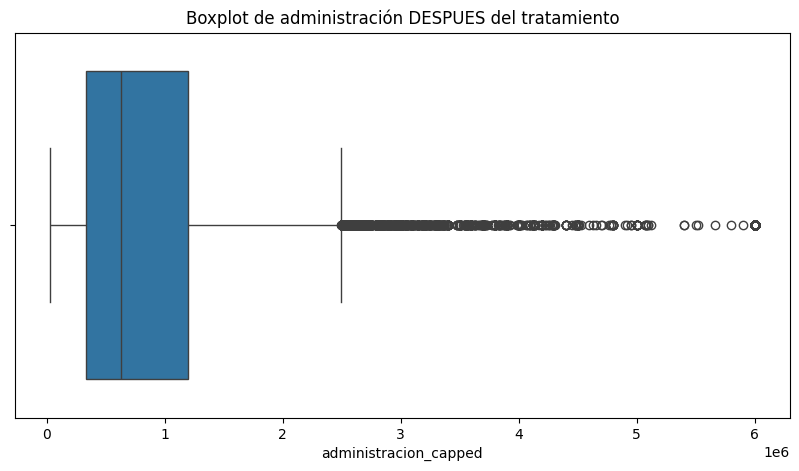

In [330]:
#Gráfica - Boxplot de administracion DEPUES del tratamiento
plt.figure(figsize=(10,5))
sns.boxplot(x=df['administracion_capped'])
plt.title('Boxplot de administración DESPUES del tratamiento')
plt.xlabel('administracion_capped')
plt.show()

Relacion mas para popularidad que para venta - Argumentar

# **Selección de variables y visualización de relaciones**

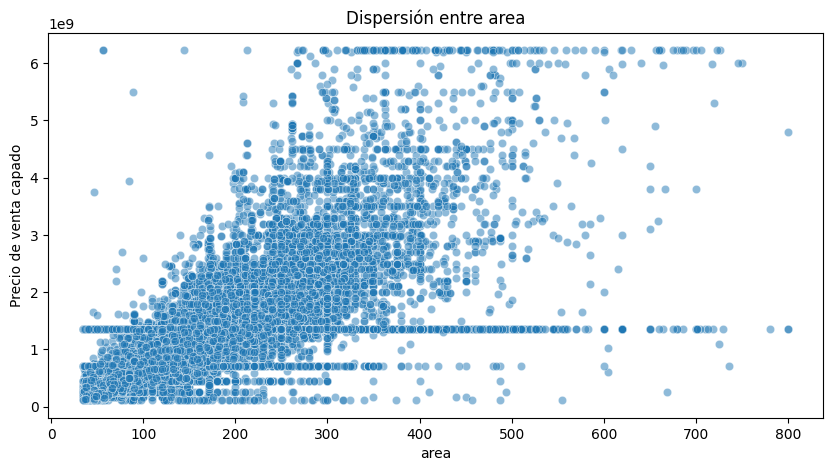

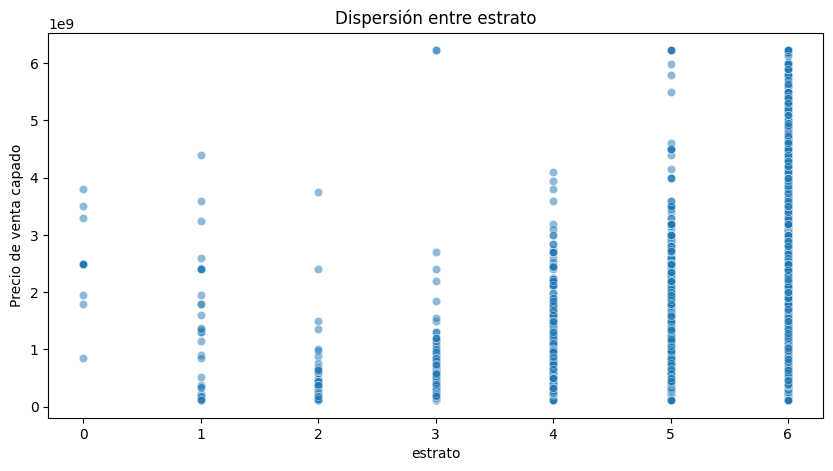

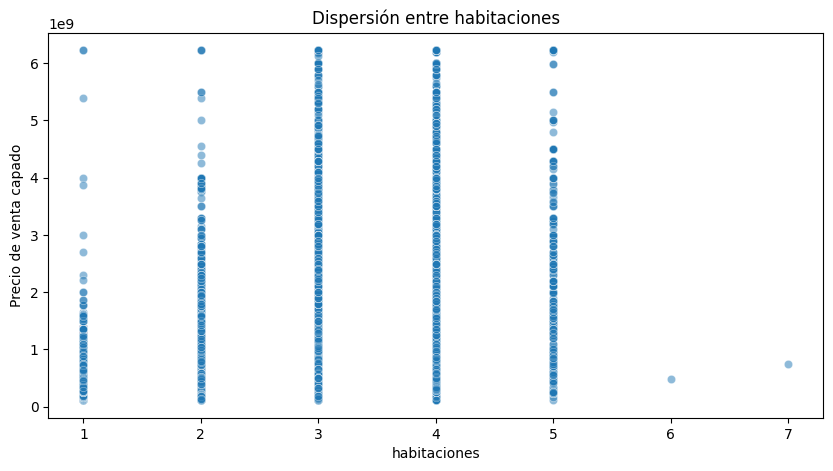

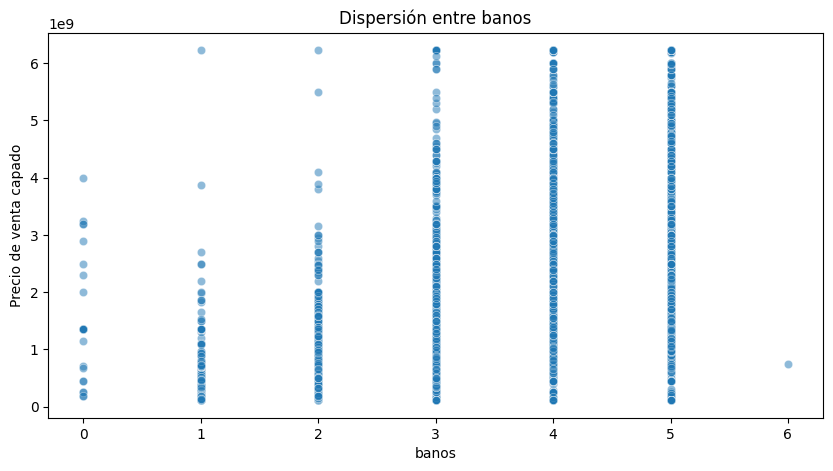

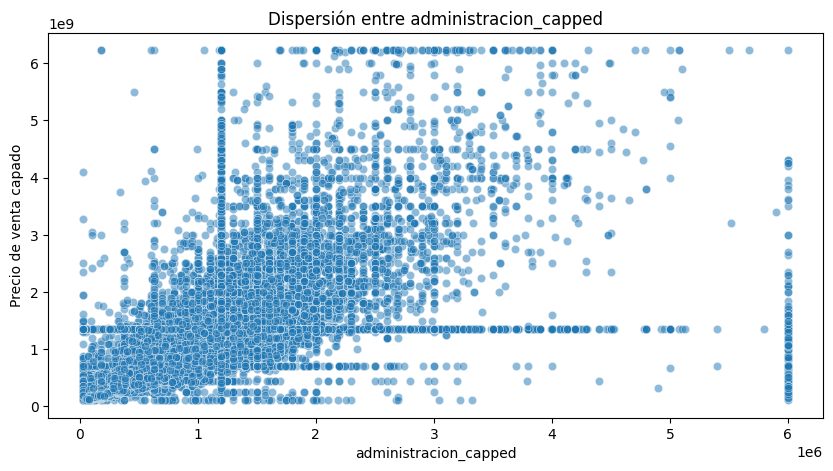

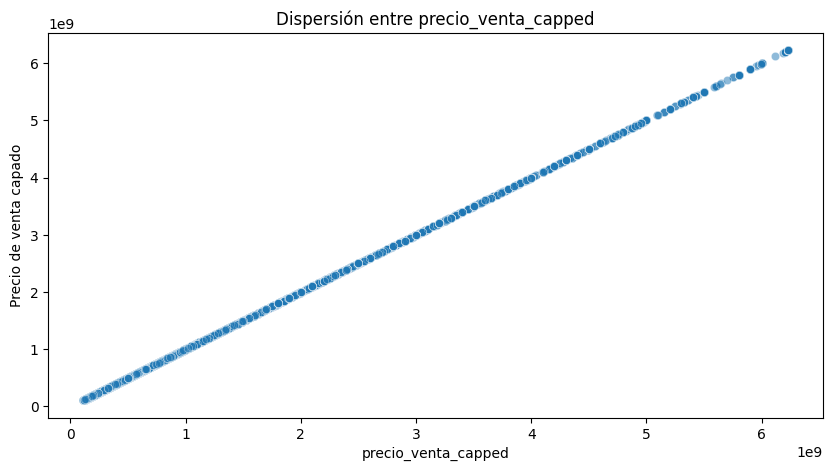

In [331]:
#Lista de variables explicativas a evaluar
#Variables númericas
variables_evaluar = ['area', 'estrato', 'habitaciones', 'banos', 'administracion_capped','precio_venta_capped']

# Scatterplots con variable dependiente 'area inmueble'
for var in variables_evaluar:
    plt.figure(figsize=(10,5))
    sns.scatterplot(x=var, y='precio_venta_capped', data=df, alpha=0.5)
    plt.title(f'Dispersión entre {var}')
    plt.xlabel(var)
    plt.ylabel('Precio de venta capado')
    plt.show()

#**Regresión lineal, evaluación y revisión de supuestos**

1. One-Hot Encoding de categóricas: tipo_propiedad, tipo_operacion, sector, antiguedad y estado


In [332]:
print(df.dtypes)

tipo_propiedad           category
tipo_operacion           category
precio_venta              float64
area                      float64
habitaciones                Int64
banos                       Int64
administracion            float64
parqueaderos                Int64
sector                   category
estrato                     Int64
antiguedad               category
estado                   category
precio_arriendo           float64
gimnasio                    Int64
ascensor                    Int64
salon_comunal               Int64
vigilancia                  Int64
is_cerca_estacion_tm        int64
is_cerca_parque             int64
precio_venta_capped       float64
administracion_capped     float64
dtype: object


In [333]:
#Hot encode de las columnas
cat_cols = ['tipo_propiedad', 'tipo_operacion', 'sector', 'antiguedad', 'estado']

df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)


In [334]:
#Comprobación del encode de las columnas dummy fue correcto para el modelo
[col for col in df_encoded.columns if col in cat_cols]

[]

In [335]:
#Columna dummy fue creada como booelan no como int
df_encoded.filter(regex='tipo_propiedad').head()


tipo_propiedad_CASA  tipo_propiedad_CASA CON CONJUNTO CERRADO
0                False                                     False
1                False                                     False
2                False                                     False
3                False                                     False
4                False                                     False

In [336]:
df_encoded.filter(regex='tipo_propiedad').dtypes

tipo_propiedad_CASA                         bool
tipo_propiedad_CASA CON CONJUNTO CERRADO    bool
dtype: object

In [337]:
#Corrección de columna dummy fue creada como booelan no como int
df_encoded = df_encoded.astype({col: 'int' for col in df_encoded.select_dtypes('bool').columns})


In [338]:
df_encoded.filter(regex='tipo_propiedad').head()

tipo_propiedad_CASA  tipo_propiedad_CASA CON CONJUNTO CERRADO
0                    0                                         0
1                    0                                         0
2                    0                                         0
3                    0                                         0
4                    0                                         0

In [339]:
df_encoded.filter(regex='tipo_propiedad').dtypes

tipo_propiedad_CASA                         int64
tipo_propiedad_CASA CON CONJUNTO CERRADO    int64
dtype: object

In [340]:
df_encoded.filter(regex='tipo_operacion').head()

tipo_operacion_VENTA  tipo_operacion_VENTA Y ARRIENDO
0                     1                                0
1                     1                                0
2                     1                                0
3                     1                                0
4                     1                                0

In [341]:
df_encoded.filter(regex='sector').head()

sector_ALAMOS  sector_ALTOS DE SUBA Y CERROS DE SAN JORGE  sector_AMERICAS  \
0              0                                           0                0   
1              0                                           0                0   
2              0                                           0                0   
3              0                                           0                0   
4              0                                           0                0   

   sector_ANTONIO NARINO  sector_APOGEO  sector_ARBORIZADORA  sector_BAVARIA  \
0                      0              0                    0               0   
1                      0              0                    0               0   
2                      0              0                    0               0   
3                      0              0                    0               0   
4                      0              0                    0               0   

   sector_BOLIVIA  sector_BOSA CENTRAL  sector_BOSA OCCIDENTAL  \
0               0                    0                       0   
1               0                    0                       0   
2               0                    0                       0   
3               0                    0                       0   
4               0                    0                       0   

   sector_BOSA SOACHA  sector_BOYACA REAL  sector_BRITALIA  sector_CALANDAIMA  \
0                   0                   0                1                  0   
1                   0                   0                0                  0   
2                   0                   0                0                  0   
3                   0                   0                0                  0   
4                   0                   0                0                  0   

   sector_CAPELLANIA  sector_CARVAJAL  sector_CASA BLANCA SUBA  \
0                  0                0                        0   
1                  0                0                        0   
2                  0                0                        0   
3                  0                0                        0   
4                  0                0                        0   

   sector_CASTILLA  sector_CASTILLA MARSELLA  sector_CEDRITOS  \
0                0                         0                0   
1                0                         0                0   
2                0                         0                0   
3                0                         0                0   
4                0                         0                0   

   sector_CENTRO INTERNACIONAL  sector_CENTRO NARINO  \
0                            0                     0   
1                            0                     0   
2                            0                     0   
3                            0                     0   
4                            0                     0   

   sector_CENTRO Y ZONA COLONIAL  sector_CERROS DE SUBA  sector_CHAPINERO  \
0                              0                      0                 0   
1                              0                      0                 0   
2                              0                      0                 0   
3                              0                      0                 0   
4                              0                      0                 0   

   sector_CHAPINERO ALTO  sector_CHICO  sector_CHICO LAGO  \
0                      0             0                  0   
1                      0             0                  0   
2                      0             0                  0   
3                      0             0                  0   
4                      0             0                  0   

   sector_CIUDAD BOLIVAR  sector_CIUDAD MONTES  \
0                      0                     0   
1                      0                     0   
2                      0                     0

In [342]:
df_encoded.filter(regex='antiguedad').head()

antiguedad_ENTRE 0 Y 5 ANOS  antiguedad_ENTRE 10 Y 20 ANOS  \
0                            0                              1   
1                            0                              0   
2                            1                              0   
3                            0                              1   
4                            0                              0   

   antiguedad_ENTRE 5 Y 10 ANOS  antiguedad_MAS DE 20 ANOS  \
0                             0                          0   
1                             0                          1   
2                             0                          0   
3                             0                          0   
4                             0                          1   

   antiguedad_PARA ESTRENAR  antiguedad_REMODELADO  antiguedad_SOBRE PLANOS  
0                         0                      0                        0  
1                         0                      0                        0  
2                         0                      0                        0  
3                         0                      0                        0  
4                         0                      0                        0

In [343]:
df_encoded.filter(regex='estado').head()

estado_USADO
0             0
1             0
2             0
3             0
4             0

**2. Escalado y/o normalización de las variables numéricas:**

* precio_arriendo
* Precio_venta_capped
* Administracion_capped
* área


In [344]:
df_encoded.columns.tolist()

['precio_venta',
 'area',
 'habitaciones',
 'banos',
 'administracion',
 'parqueaderos',
 'estrato',
 'precio_arriendo',
 'gimnasio',
 'ascensor',
 'salon_comunal',
 'vigilancia',
 'is_cerca_estacion_tm',
 'is_cerca_parque',
 'precio_venta_capped',
 'administracion_capped',
 'tipo_propiedad_CASA',
 'tipo_propiedad_CASA CON CONJUNTO CERRADO',
 'tipo_operacion_VENTA',
 'tipo_operacion_VENTA Y ARRIENDO',
 'sector_ALAMOS',
 'sector_ALTOS DE SUBA Y CERROS DE SAN JORGE',
 'sector_AMERICAS',
 'sector_ANTONIO NARINO',
 'sector_APOGEO',
 'sector_ARBORIZADORA',
 'sector_BAVARIA',
 'sector_BOLIVIA',
 'sector_BOSA CENTRAL',
 'sector_BOSA OCCIDENTAL',
 'sector_BOSA SOACHA',
 'sector_BOYACA REAL',
 'sector_BRITALIA',
 'sector_CALANDAIMA',
 'sector_CAPELLANIA',
 'sector_CARVAJAL',
 'sector_CASA BLANCA SUBA',
 'sector_CASTILLA',
 'sector_CASTILLA MARSELLA',
 'sector_CEDRITOS',
 'sector_CENTRO INTERNACIONAL',
 'sector_CENTRO NARINO',
 'sector_CENTRO Y ZONA COLONIAL',
 'sector_CERROS DE SUBA',
 'sector_

In [345]:
#Normalización de columnas
from sklearn.preprocessing import StandardScaler

cols_to_scale = [
    'area',
    'administracion_capped',
    'precio_venta_capped',
    'precio_arriendo',
]

scaler = StandardScaler()
df_encoded[cols_to_scale] = scaler.fit_transform(df_encoded[cols_to_scale])


In [346]:
#Verifiación de la Normalización de columnas
df_encoded[cols_to_scale].describe().T


count          mean       std       min       25%  \
area                   41490.0  8.768327e-17  1.000012 -1.056264 -0.736168   
administracion_capped  41490.0 -2.192082e-17  1.000012 -1.070441 -0.670917   
precio_venta_capped    41490.0 -8.220306e-17  1.000012 -1.013891 -0.637158   
precio_arriendo        15219.0  2.801272e-18  1.000033 -0.050673 -0.044874   

                            50%       75%        max  
area                  -0.330713  0.437516   7.106176  
administracion_capped -0.292147  0.447232   6.673580  
precio_venta_capped   -0.317684  0.430018   6.119886  
precio_arriendo       -0.039075 -0.025498  61.352042

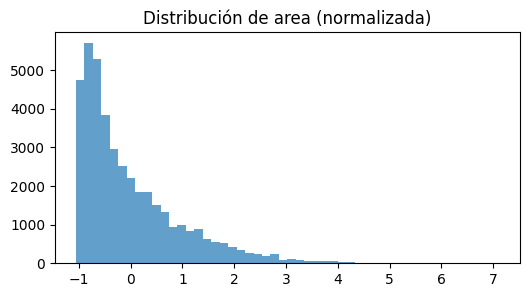

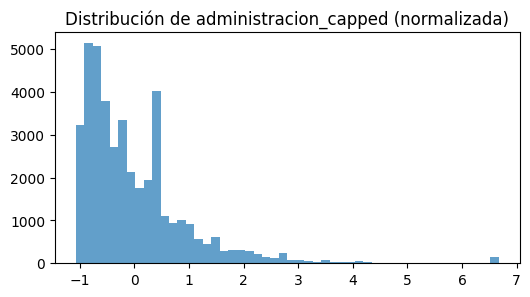

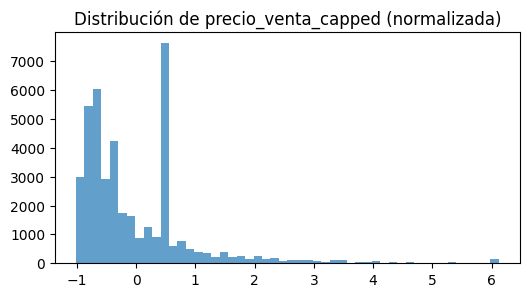

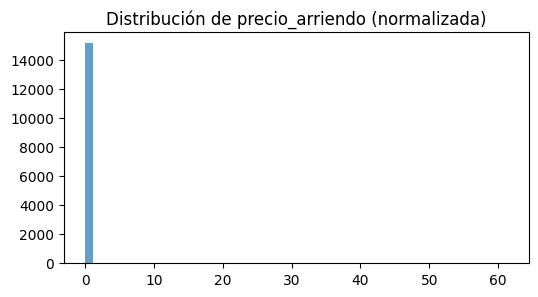

In [347]:
#Gráfica - Verifiación de la Normalización de columnas
import matplotlib.pyplot as plt

for col in cols_to_scale:
    plt.figure(figsize=(6,3))
    plt.hist(df_encoded[col], bins=50, alpha=0.7)
    plt.title(f"Distribución de {col} (normalizada)")
    plt.show()


In [348]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41490 entries, 0 to 43012
Columns: 130 entries, precio_venta to estado_USADO
dtypes: Int64(8), float64(6), int64(116)
memory usage: 41.8 MB


###2. Entrenamiento del modelo de machine learning
**3. Modelos de regresión lienal**

Modelo N1 Lineal Regression (Regularización L1)

In [349]:
# Entrenamiento del modelo de machine learning
from sklearn.model_selection import train_test_split

# Selección de variables.
X = df[['area', 'banos', 'habitaciones', 'estrato', 'administracion_capped', 'parqueaderos']]
y = df['precio_venta_capped']

# División de los datos en conjuntos de entrenamiento, validación y prueba
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

In [350]:
# Lista de variables explicativas NUMÉRICAS que sí tienen relación con precio
#variables_evaluar = ['area', 'habitaciones', 'banos', 'parqueaderos', 'estrato', 'administracion_capped']

# Scatterplots con variable dependiente 'precio_venta_capped'
#for var in variables_evaluar:
#   plt.figure(figsize=(7,4))
#    sns.scatterplot(x=var, y='precio_venta_capped', data=df, alpha=0.5)
#    plt.title(f'Dispersión entre {var} y precio de venta (capado)')
#    plt.xlabel(var)
#    plt.ylabel('Precio venta (capado)')
#    plt.show()


In [351]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor

# --- Imputación de valores faltantes ---
imputador = SimpleImputer(strategy='median')

X_train_imputado = imputador.fit_transform(X_train)
X_test_imputado = imputador.transform(X_test)

# --- Entrenamiento del modelo ---
modelo_lr = LinearRegression()
modelo_lr.fit(X_train_imputado, y_train)

# --- Predicción sobre el conjunto de prueba ---
y_pred_test_lr = modelo_lr.predict(X_test_imputado)

# --- Cálculo de métricas ---
mae_lr = mean_absolute_error(y_test, y_pred_test_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_test_lr))
r2_lr = r2_score(y_test, y_pred_test_lr)

print("Resultados - Regresión Lineal:")
print(f"MAE: {mae_lr}")
print(f"RMSE: {rmse_lr}")
print(f"R²: {r2_lr}")

# --- Modelo 2: Lasso Regression ---
modelo_lasso = Lasso(alpha=1.0, random_state=42, max_iter=10000)
modelo_lasso.fit(X_train_imputado, y_train)

# --- Predicciones ---
y_pred_lasso = modelo_lasso.predict(X_test_imputado)

# --- Métricas de desempeño ---
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
r2_lasso = r2_score(y_test, y_pred_lasso)

print("Lasso Regression:")
print(f"MAE: {mae_lasso}")
print(f"RMSE: {rmse_lasso}")
print(f"R²: {r2_lasso}")

# --- Modelo 3: Ridge Regression ---
modelo_ridge = Ridge(alpha=1.0, random_state=42)
modelo_ridge.fit(X_train_imputado, y_train)

# --- Predicciones ---
y_pred_ridge = modelo_ridge.predict(X_test_imputado)

# --- Métricas de desempeño ---
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Ridge Regression:")
print(f"MAE: {mae_ridge}")
print(f"RMSE: {rmse_ridge}")
print(f"R²: {r2_ridge}")

# --- Modelo 4: Random Forest ---
modelo_rf = RandomForestRegressor(n_estimators=100, random_state=42)
modelo_rf.fit(X_train_imputado, y_train)

# --- Predicción ---
y_pred_rf = modelo_rf.predict(X_test_imputado)

# --- Métricas de desempeño ---
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest:")
print(f"MAE: {mae_rf}")
print(f"RMSE: {rmse_rf}")
print(f"R²: {r2_rf}")



Resultados - Regresión Lineal:
MAE: 295335254.24995214
RMSE: 509408030.77284294
R²: 0.6378942575580056
Lasso Regression:
MAE: 295335253.80886406
RMSE: 509408030.80880326
R²: 0.6378942575068818
Ridge Regression:
MAE: 295333609.86936575
RMSE: 509408130.57790536
R²: 0.6378941156678601
Random Forest:
MAE: 259579142.04674238
RMSE: 518095638.35594606
R²: 0.6254380047304988


In [352]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# --- Imputación de valores faltantes para el conjunto de validación ---
X_val_imputado = imputador.transform(X_val)

# --- Predicciones con Lasso ---
y_val_pred_lasso = modelo_lasso.predict(X_val_imputado)

# --- Cálculo de métricas ---
mae_val_lasso = mean_absolute_error(y_val, y_val_pred_lasso)
rmse_val_lasso = np.sqrt(mean_squared_error(y_val, y_val_pred_lasso))
r2_val_lasso = r2_score(y_val, y_val_pred_lasso)

print("Validación - Lasso Regression:")
print(f"MAE: {mae_val_lasso}")
print(f"RMSE: {rmse_val_lasso}")
print(f"R²: {r2_val_lasso}")


Validación - Lasso Regression:
MAE: 295988305.97234887
RMSE: 506485887.737559
R²: 0.6502597121203805


## **3. [20%] Análisis cuantitativo de resultados del modelo**

* Métricas de evaluación para sus modelos
* Significado y valor para la empresa
* Calidad del modelo

Se realizaron las metricas fueron:

- MAE (Mean Absolute Eror)
- RMSE (Root Mean Squared Error)
- R2 (Coeficiente de determinación)

los resultados de cada modelo fueron:

Regresión Lineal:
MAE: 295335254.2504284
RMSE: 509408030.7730341
R²: 0.6378942575577338

Lasso Regression:
MAE: 295335253.80886406
RMSE: 509408030.8088033
R²: 0.6378942575068817

Ridge Regression:
MAE: 295333609.86936545
RMSE: 509408130.5779054
R²: 0.6378941156678601

Ofrecieron resultados similares, su comportamiento es lineal respecto al precio de venta. Como impacto positivo el error promedio ronda los $295 millones el cual es aceptable para valores de vivienda de lujo. Se contemplaron las variables que son tenidas en cuenta tipicamente por los usuarios. Para mejorar el modelo se podrian implementar modelos que permitan usarse en relaciones no lineales de variables, dado que el mercado es cambiante agregar algunas variables como PIB u otras que realicen variaciones de precio y no sean claras para el modelo.   



# **4. [20%] Análisis cualitativo de resultados del modelo**
4.1. Análisis cualitativo de sus modelos: SHAPLEY y Lime.

4.2. Examine tanto el comportamiento global.

4.3. Comportamiento de una muestra de predicciones individuales.

4.5. Construya una interpretación de cómo está funcionando su modelo.

In [353]:
%pip install shap lime

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


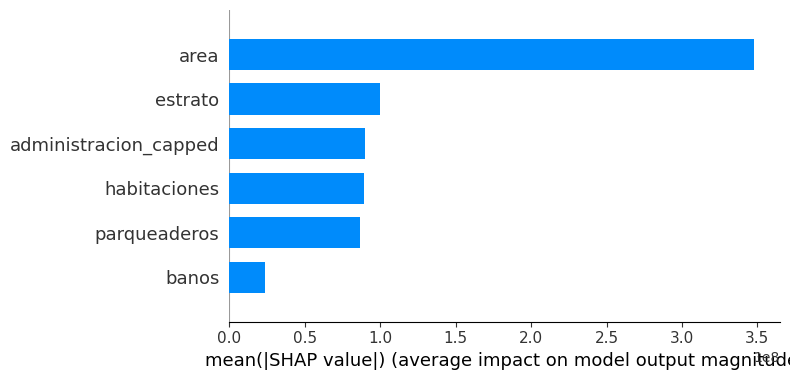

In [354]:
import shap
import matplotlib.pyplot as plt

# Lista con los nombres de las variables en el mismo orden que X_train_imputado
feature_names = ['area', 'banos', 'habitaciones', 'estrato', 'administracion_capped', 'parqueaderos']

# Crear un explainer para el modelo Lasso
explainer = shap.Explainer(modelo_lasso, X_train_imputado, feature_names=feature_names)

# Calcular los valores SHAP sobre el conjunto de prueba
shap_values = explainer(X_test_imputado)

# --- Análisis Global ---
# Gráfico de barras con la importancia media de cada variable
shap.summary_plot(shap_values, feature_names=feature_names, plot_type='bar')

# --- Análisis Individual ---
# Gráfico de cascada para una muestra (ejemplo: primer registro del test)
shap.plots.waterfall(shap_values[0])


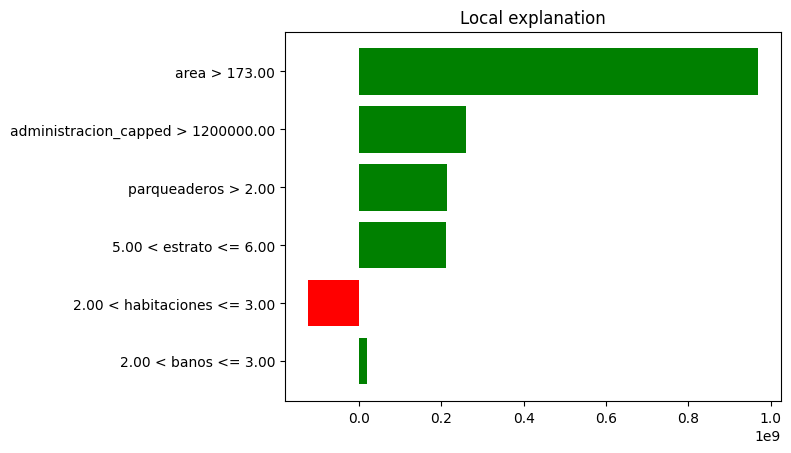

In [355]:
import lime
import lime.lime_tabular
import matplotlib.pyplot as plt

# Crear el explicador LIME adaptado a tu conjunto de entrenamiento imputado
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train_imputado,
    feature_names=X.columns.tolist(),
    mode='regression',
    discretize_continuous=True
)

# Seleccionamos una muestra del conjunto de prueba
i = 5  # Puedes cambiar el índice
exp = explainer.explain_instance(
    data_row=X_test_imputado[i],
    predict_fn=modelo_lasso.predict
)

# Mostrar como gráfico dentro del notebook
fig = exp.as_pyplot_figure()
plt.show()



# **5. [20%] Generación de valor: Determine la ganancia esperada para HabitAlpes con la**

5.1. implementación del modelo por cada estimación, así como el punto a partir del cual la inversión en el modelo empezará a dejar dividendos (break-even point).

5.2. Realice una estimación paramétrica, haciendo explícitos todos los supuestos usando datos, incluyendo fuentes aplicables y estadísticas recientes. Es posible que necesite clasificar las estimaciones usando una matriz, para estimar los valores asociados a los diferentes tipos de predicciones. Para este punto, se le recomienda considerar:

* Los costos de tiempo asociado a peritos.

* El ahorro de tiempo teórico de su modelo.

* El costo asociado a los errores de su modelo.

* El ahorro real por estimación acertada.

* El ROI tomando en cuenta los costos de desarrollo y despliegue de su modelo.

**ESTIMACIÓN ACTUAL DE PERITAJE SIN MODELO**

Tiempo estimado por perito -  inversión de 6 horas (Al no tener espeficicado en esas 6 horas cuantos inmuebles se hace peritaje se va a suponer que solo es 1 inmueble en 6 hrs x 1 perito + salario por hora: $9.500) con el fin de generar un precio de venta. 

In [356]:
#Calculo de recursos de peritaje actual
#Tomando en cuenta que jornada laboral completa en colombia son 44 (8 horas diarias), segun el decreto 2022 de 2023 del ministerio del trabajo (https://www.mintrabajo.gov.co/comunicados/2023/julio/los-salarios-de-las-y-los-trabajadores-se-deberan-mantener-con-la-reduccion-de-la-jornada-laboral-en-colombia) 

# Cálculo de productividad actual del perito
horas_semanales = 44
horas_por_inmueble = 6

# Inmuebles que un perito revisa por semana
inmuebles_por_semana = horas_semanales / horas_por_inmueble

# Inmuebles que un perito revisa por mes (4 semanas)
inmuebles_por_mes = inmuebles_por_semana * 4

print("Un perito revisa por semana:", inmuebles_por_semana)
print("Un perito revisa por mes:", inmuebles_por_mes)


Un perito revisa por semana: 7.333333333333333
Un perito revisa por mes: 29.333333333333332


In [357]:
salario_hora = 9500
horas_por_inmueble = 6

costo_por_inmueble = salario_hora * horas_por_inmueble
print("Costo por inmueble:", costo_por_inmueble)


Costo por inmueble: 57000


Lo anterior, es una estimasion solo considerando el recurso humano y de tiempo dejando afuera otros tipos de factoes que pueden afectar las dinamicas o recursos adicionales. 

**ESTIMACIÓN ACTUAL DE PERITAJE CON MODELO**

Ahora bien, con el algoritmo se estima pasar de 6 horas a 1 hora en el proceso de estimación por parte del perito. Por otro lado, se proyecta que el modelo de  HabitAlpes revisara 500 inmuebles al mes. 

In [358]:
inmuebles_mes = 500
costo_por_inmueble = 9500 * 6  # 57.000

costo_mensual = inmuebles_mes * costo_por_inmueble
costo_anual = costo_mensual * 12

print("Costo mensual actual:", costo_mensual)
print("Costo anual actual:", costo_anual)


Costo mensual actual: 28500000
Costo anual actual: 342000000


In [359]:
filtro = df[
    (df["tipo_operacion"].isin(["VENTA", "VENTA Y ARRIENDO"])) &
    (df["precio_venta"] < 20_000_000)
]

total_casos_peritaje = filtro.shape[0]
print("Casos que requieren peritaje presencial:", total_casos_peritaje)


Casos que requieren peritaje presencial: 51


In [360]:
costo_inmueble = 9500 * 6  # 57.000
costo_total_dataset = total_casos_peritaje * costo_inmueble

print("Costo total del peritaje según dataset:", costo_total_dataset)


Costo total del peritaje según dataset: 2907000


In [361]:
horas_por_inmueble = 6
horas_totales = total_casos_peritaje * horas_por_inmueble
dias_laborales = horas_totales / 8

print("Horas necesarias:", horas_totales)
print("Días laborales necesarios:", dias_laborales)


Horas necesarias: 306
Días laborales necesarios: 38.25


In [362]:
peritos = 10
dias_con_10 = dias_laborales / peritos
print("Días necesarios con 10 peritos:", dias_con_10)


Días necesarios con 10 peritos: 3.825


In [363]:
# Parámetros
salario_hora = 9500
inmuebles_mes = 500

# Costo sin modelo → 6 horas por inmueble
costo_sin_modelo = salario_hora * 6 * inmuebles_mes   # 28.5M

# Costo con modelo → 1 hora por inmueble
costo_con_modelo = salario_hora * 1 * inmuebles_mes   # 4.75M

# --- Gráfica comparativa ---

plt.figure(figsize=(8,6))

modelos = ["Sin modelo", "Con modelo"]
costos = [costo_sin_modelo, costo_con_modelo]
colores = ["salmon", "lightgreen"]

plt.bar(modelos, costos, color=colores)
plt.title("Comparación de Costos Mensuales del Peritaje\nCon modelo vs Sin modelo", fontsize=14)
plt.ylabel("Costo mensual (COP)", fontsize=12)

# Etiquetas con valores en millones
for i, v in enumerate(costos):
    plt.text(i, v + 500000, f"{v/1_000_000:.1f} M", 
             ha="center", fontsize=12, fontweight="bold")

plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.show()


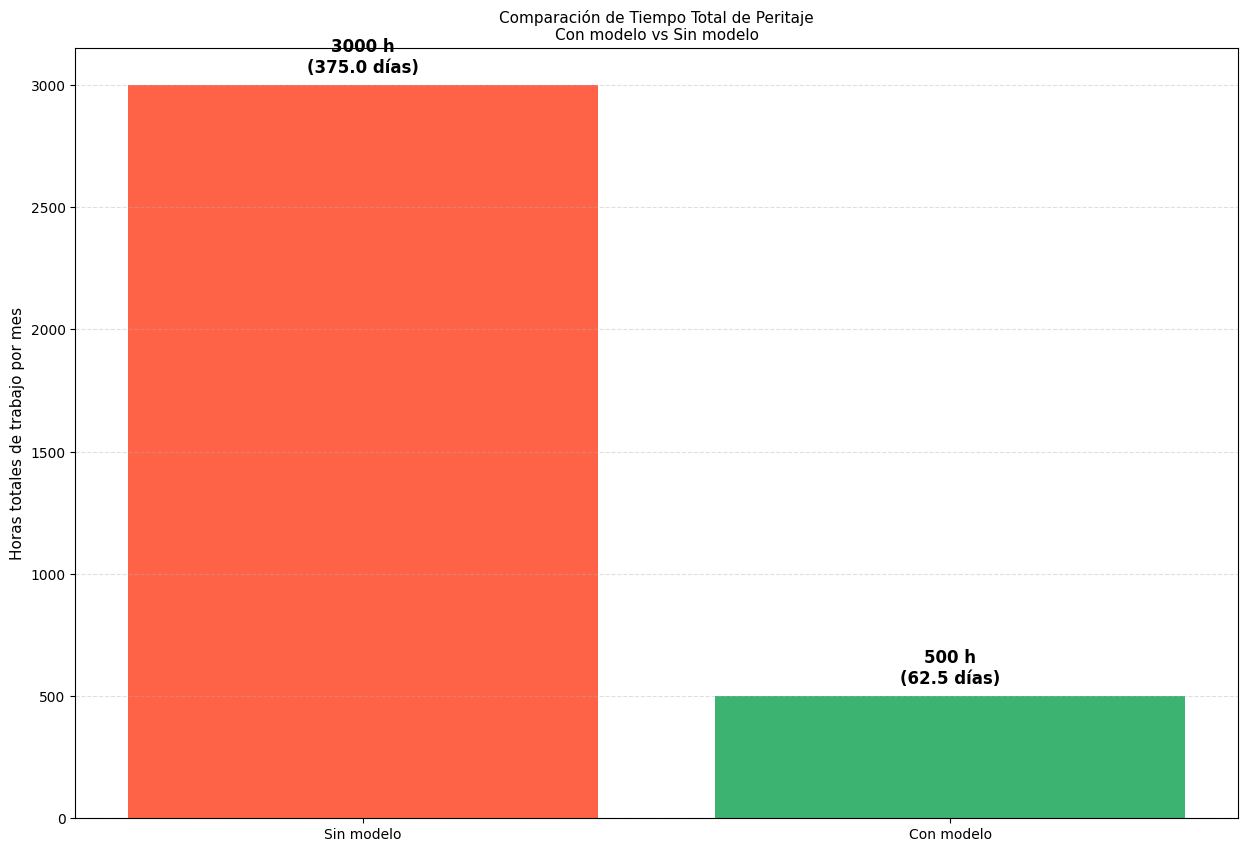

In [364]:
# Parámetros del proyecto
inmuebles_mes = 500
horas_sin_modelo = 6
horas_con_modelo = 1

# Cálculo de tiempos
tiempo_sin_modelo = inmuebles_mes * horas_sin_modelo
tiempo_con_modelo = inmuebles_mes * horas_con_modelo

# Conversión a días laborales (8 horas)
dias_sin_modelo = tiempo_sin_modelo / 8
dias_con_modelo = tiempo_con_modelo / 8

# --- Gráfica ---
plt.figure(figsize=(15,10))

metodos = ["Sin modelo", "Con modelo"]
horas = [tiempo_sin_modelo, tiempo_con_modelo]
colores = ["tomato", "mediumseagreen"]

plt.bar(metodos, horas, color=colores)
plt.title("Comparación de Tiempo Total de Peritaje\nCon modelo vs Sin modelo", fontsize=11)
plt.ylabel("Horas totales de trabajo por mes", fontsize=11)

# Etiquetas
for i, v in enumerate(horas):
    plt.text(i, v + 50, f"{v} h\n({v/8:.1f} días)", 
             ha="center", fontsize=12, fontweight="bold")

plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.show()


El costo asociado a los errores de su modelo & El ahorro real por estimación acertada.

ROI dessarrollo del modelo 

In [365]:

supuestos = {
    "costo_perito_estimacion": 24_000,      # COP por estimación (manual)
    "costo_modelo_por_estimacion": 10_000,  # COP por estimación (infra)
    "precision_modelo": 0.65,
    "cantidad_estimaciones_mes": 500,
    "costo_desarrollo_modelo": 12_000_000,
    "costo_mantenimiento_mensual": 500_000
}

def calc_finanzas(cantidad, precision, sup):
    baseline = cantidad * sup["costo_perito_estimacion"]
    aciertos = int(round(cantidad * precision))
    errores = cantidad - aciertos
    costo_modelo = (
        cantidad * sup["costo_modelo_por_estimacion"]   # coste por predicción
        + errores * sup["costo_perito_estimacion"]      # perito solo si falla
        + sup["costo_mantenimiento_mensual"]
    )
    ahorro_mensual = baseline - costo_modelo
    ahorro_anual = ahorro_mensual * 12
    break_even = sup["costo_desarrollo_modelo"] / ahorro_mensual if ahorro_mensual > 0 else math.inf
    roi_anual_pct = ((ahorro_anual - sup["costo_desarrollo_modelo"]) / sup["costo_desarrollo_modelo"]) * 100
    return {
        "baseline_mensual": baseline,
        "costo_modelo_mensual": costo_modelo,
        "ahorro_mensual": ahorro_mensual,
        "ahorro_anual": ahorro_anual,
        "break_even_meses": break_even,
        "roi_anual_pct": roi_anual_pct,
        "aciertos": aciertos,
        "errores": errores
    }

# cálculo con supuestos actuales
res = calc_finanzas(supuestos["cantidad_estimaciones_mes"], supuestos["precision_modelo"], supuestos)

# métricas de desempeño del modelo (si están definidas en el notebook)
try:
    mae_test = mean_absolute_error(y_test, y_pred_lasso)
except Exception:
    mae_test = None

# Conteo errores graves (>20M) si y_test/y_pred_lasso existen
try:
    subestimaciones_graves = int(((y_test - y_pred_lasso) > 20_000_000).sum())
    sobreestimaciones_graves = int(((y_pred_lasso - y_test) > 20_000_000).sum())
except Exception:
    subestimaciones_graves = None
    sobreestimaciones_graves = None

print(f"Baseline mensual (sin modelo): {res['baseline_mensual']:,.0f} COP")
print(f"Costo mensual con modelo: {res['costo_modelo_mensual']:,.0f} COP")
print(f"Ahorro mensual esperado: {res['ahorro_mensual']:,.0f} COP")
print(f"Ahorro anual esperado: {res['ahorro_anual']:,.0f} COP")
print(f"Break-even (meses): {res['break_even_meses']:.1f}" if res['ahorro_mensual']>0 else "Break-even: inf (no hay ahorro)")
print(f"ROI anual aproximado: {res['roi_anual_pct']:.1f} %")
print(f"Aciertos (mes): {res['aciertos']}, Errores (mes): {res['errores']}")
if mae_test is not None:
    print(f"MAE en test (COP): {mae_test:,.0f}")
if subestimaciones_graves is not None:
    print(f"Subestimaciones graves (>20M): {subestimaciones_graves}")
    print(f"Sobreestimaciones graves (>20M): {sobreestimaciones_graves}")

# Análisis de sensibilidad rápido (precisión y volumen)
precisiones = [0.5, 0.6, 0.65, 0.7, 0.8]
volumenes = [100, 500, 1000]

rows = []
for vol in volumenes:
    for p in precisiones:
        r = calc_finanzas(vol, p, supuestos)
        rows.append({
            "volumen_mes": vol,
            "precision": p,
            "ahorro_mensual": r["ahorro_mensual"],
            "break_even_meses": r["break_even_meses"],
            "roi_anual_pct": r["roi_anual_pct"]
        })

sens_df = pd.DataFrame(rows)
# mostrar resultados ordenados por volumen y precisión
print("\nSensibilidad (muestra):")
print(sens_df.pivot(index="volumen_mes", columns="precision", values="ahorro_mensual").round(0))


Baseline mensual (sin modelo): 12,000,000 COP
Costo mensual con modelo: 9,700,000 COP
Ahorro mensual esperado: 2,300,000 COP
Ahorro anual esperado: 27,600,000 COP
Break-even (meses): 5.2
ROI anual aproximado: 130.0 %
Aciertos (mes): 325, Errores (mes): 175
MAE en test (COP): 295,335,254
Subestimaciones graves (>20M): 3479
Sobreestimaciones graves (>20M): 4246

Sensibilidad (muestra):
precision       0.50     0.60     0.65     0.70     0.80
volumen_mes                                             
100          -300000   -60000    60000   180000   420000
500           500000  1700000  2300000  2900000  4100000
1000         1500000  3900000  5100000  6300000  8700000


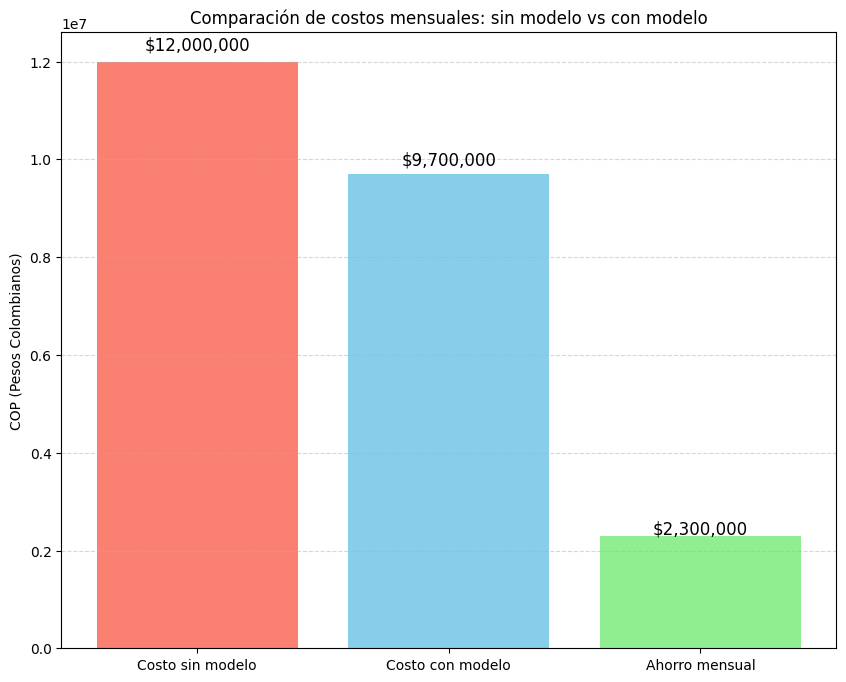

In [366]:

baseline = res["baseline_mensual"]              # 12,000,000 COP
costo_modelo = res["costo_modelo_mensual"]      # 9,700,000 COP
ahorro = res["ahorro_mensual"]                  # 2,300,000 COP

# Crear gráfico
plt.figure(figsize=(10,8))
plt.bar(["Costo sin modelo", "Costo con modelo", "Ahorro mensual"],
        [baseline, costo_modelo, ahorro],
        color=["salmon", "skyblue", "lightgreen"])

plt.title("Comparación de costos mensuales: sin modelo vs con modelo")
plt.ylabel("COP (Pesos Colombianos)")
plt.grid(axis="y", linestyle="--", alpha=0.5)

# Anotar valores encima de las barras
for i, val in enumerate([baseline, costo_modelo, ahorro]):
    plt.text(i, val + val*0.02, f"${val:,.0f}", ha='center', fontsize=12)

plt.show()


# **6. [10%] Insights: Redacte un informe ejecutivo o una presentación corta**

* Mostrar los hallazgos o insights más importantes en términos del modelo y los
resultados. Ofrezca una recomendación final para el negocio.
- Presentación con insigths adjudta en el READ ME del repo, gracias. 
